In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/My Drive/SIADS_591/Oral_Exam

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/SIADS_591/Oral_Exam


In [3]:
Case_df = pd.read_csv('Case.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
TimeProvince_df = pd.read_csv('TimeProvince.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
TimeGender_df = pd.read_csv('TimeGender.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
TimeAge_df = pd.read_csv('TimeAge.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
Time_df = pd.read_csv('Time.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
Region_df = pd.read_csv('Region.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
SeoulFloating_df = pd.read_csv('SeoulFloating.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
Policy_df = pd.read_csv('Policy.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
SearchTrend_df = pd.read_csv('SearchTrend.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na
Weather_df = pd.read_csv('Weather.csv', na_values = ['','-',' ', 'nan', 'etc']) # converting all these values to Na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


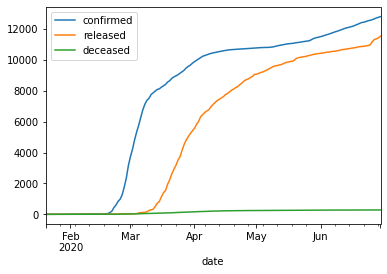

In [4]:
Time_df

Time_df['date'] = pd.to_datetime(Time_df['date'], format='%Y-%m-%d')
df = Time_df.groupby('date')['confirmed','released','deceased'].max().reset_index()
df.plot(x="date", y=["confirmed", "released", "deceased"], kind="line")


# Patient dataset - Data Cleaning


In [5]:
Patient_df = pd.read_csv('PatientInfo.csv') # Read dataset
print(Patient_df['country'].unique(), Patient_df.dtypes,Patient_df['infection_case'].unique())
Patient_df = pd.read_csv('PatientInfo.csv', na_values = ['','-',' ', 'nan', 'etc']).loc[Patient_df['country'] == "Korea"] # converting all these values to Na + filter for korea

['Korea' 'China' 'United States' 'France' 'Thailand' 'Canada' 'India'
 'Switzerland' 'Germany' 'Indonesia' 'Vietnam' 'Foreign' 'Mongolia'
 'United Kingdom' 'Spain' 'Bangladesh'] patient_id             int64
sex                   object
age                   object
country               object
province              object
city                  object
infection_case        object
infected_by           object
contact_number        object
symptom_onset_date    object
confirmed_date        object
released_date         object
deceased_date         object
state                 object
dtype: object ['overseas inflow' 'contact with patient' 'Seongdong-gu APT' 'etc'
 "Eunpyeong St. Mary's Hospital" 'Shincheonji Church' 'Dongan Church'
 'Guro-gu Call Center' nan 'Itaewon Clubs' 'Samsung Medical Center'
 'Biblical Language study meeting' 'Coupang Logistics Center'
 'Guri Collective Infection' 'KB Life Insurance' 'Gangnam Dongin Church'
 'Korea Campus Crusade of Christ' 'Yeongdeungpo Learning Insti

In [6]:
Patient_df['symptom_onset_date'] = pd.to_datetime(Patient_df['symptom_onset_date'], format='%Y-%m-%d')
Patient_df['confirmed_date'] = pd.to_datetime(Patient_df['confirmed_date'], format='%Y-%m-%d')
Patient_df['released_date'] = pd.to_datetime(Patient_df['released_date'], format='%Y-%m-%d')
Patient_df['deceased_date'] = pd.to_datetime(Patient_df['deceased_date'], format='%Y-%m-%d')

Patient_df.dtypes

patient_id                     int64
sex                           object
age                           object
country                       object
province                      object
city                          object
infection_case                object
infected_by                   object
contact_number               float64
symptom_onset_date    datetime64[ns]
confirmed_date        datetime64[ns]
released_date         datetime64[ns]
deceased_date         datetime64[ns]
state                         object
dtype: object

In [7]:
Patient_df['patient_id'].is_unique #There are duplicates in patient_id and below is the duplicated id with city taking the different value

False

In [8]:
df = Patient_df[Patient_df.duplicated(subset=['patient_id'], keep=False)]
df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1547,1200012238,female,20s,Korea,Daegu,Icheon-dong,overseas inflow,NaN,NaN,NaT,2020-06-17,NaT,NaT,isolated
1555,1200012238,female,20s,Korea,Daegu,Nam-gu,overseas inflow,NaN,NaN,NaT,2020-06-17,NaT,NaT,isolated


In [9]:
Patient_df.isnull().sum()

patient_id               0
sex                   1118
age                   1376
country                  0
province                 0
city                   200
infection_case        1615
infected_by           3780
contact_number        4354
symptom_onset_date    4437
confirmed_date           3
released_date         3550
deceased_date         5058
state                    0
dtype: int64

Patient Dataset - EDA

Text(0.5, 1.0, 'Province with the Patient count')

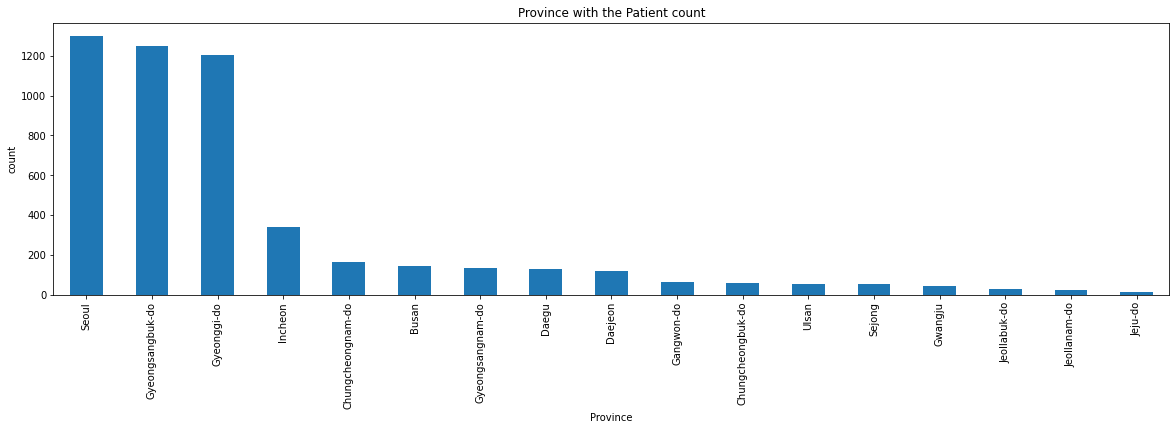

In [10]:
plt.figure(figsize=(20,5))
Patient_df.province.value_counts().plot.bar()
plt.xlabel("Province")
plt.ylabel("count")
plt.title("Province with the Patient count")


Text(0.5, 1.0, 'Gender ratio from patient_id dataset')

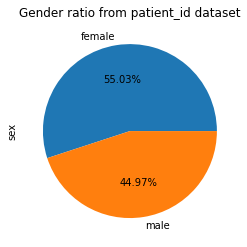

In [11]:
Patient_df.sex.value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Gender ratio from patient_id dataset")

In [12]:
import plotly.graph_objects as go
data = Patient_df[["age","sex"]].dropna()
data = data.groupby(by=["age","sex"]).size().reset_index().rename(columns={0:"count"})
fig = go.Figure(data=[
    go.Bar(name='Female', x=data.age.unique(), y=data[data.sex=="female"]["count"], marker_color='pink'),
    go.Bar(name='Male', x=data.age.unique(), y=data[data.sex=="male"]["count"], marker_color='darkblue')
])
fig.update_layout(title_text='Age / Gender distribution of confirmed cases')
fig.show()


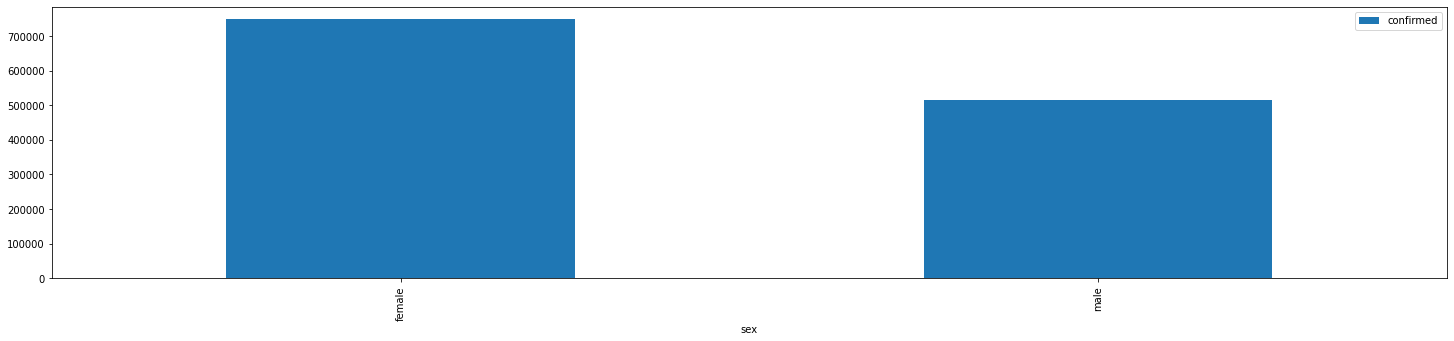

In [13]:
TimeGender_df['date'] = pd.to_datetime(TimeGender_df['date'], format='%Y-%m-%d')

df_daily = TimeGender_df.groupby('sex')['confirmed'].sum().reset_index()
df_daily.plot(x='sex', y='confirmed', kind="bar", figsize=(25,5))


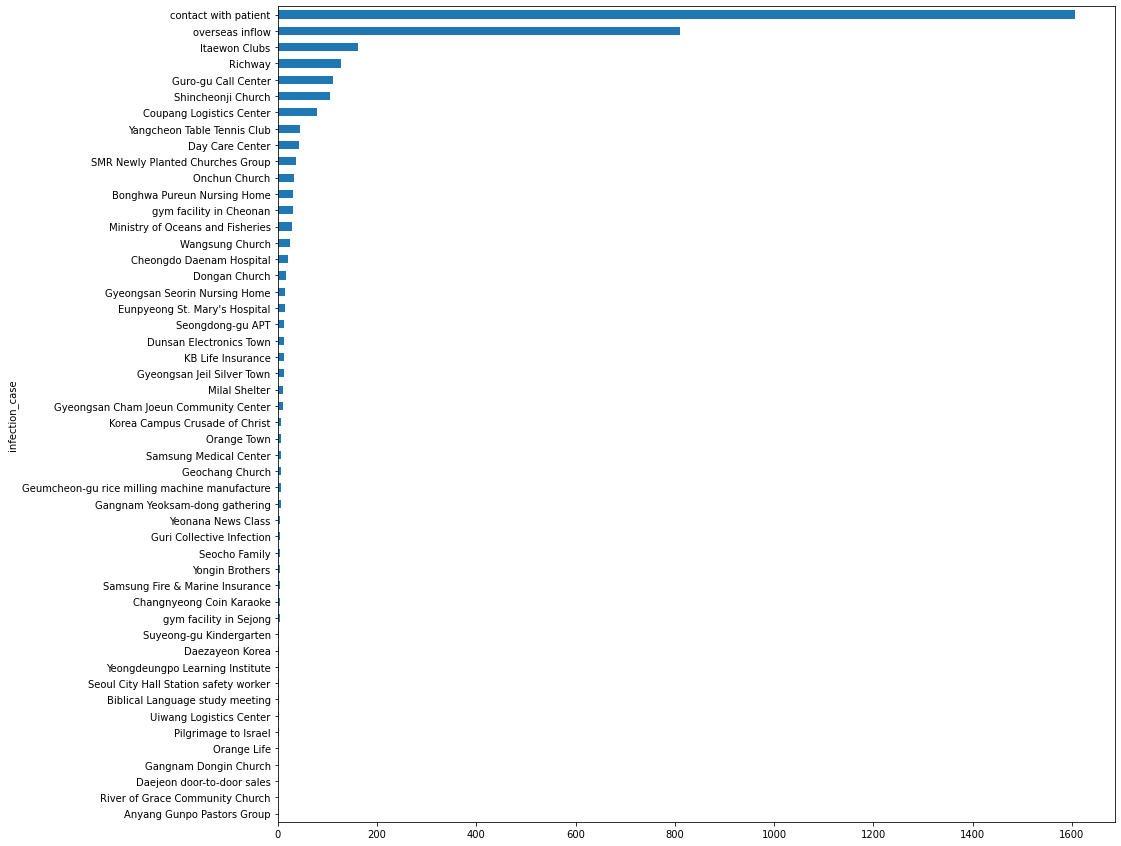

In [14]:
Patient_df.groupby('infection_case')['patient_id'].count().sort_values().plot(kind='barh', figsize=(15,15))

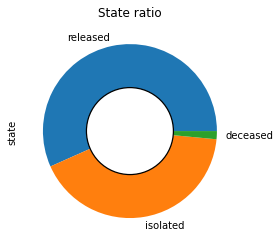

In [15]:
plt.title("State ratio")
Patient_df.state.value_counts().plot.pie()
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

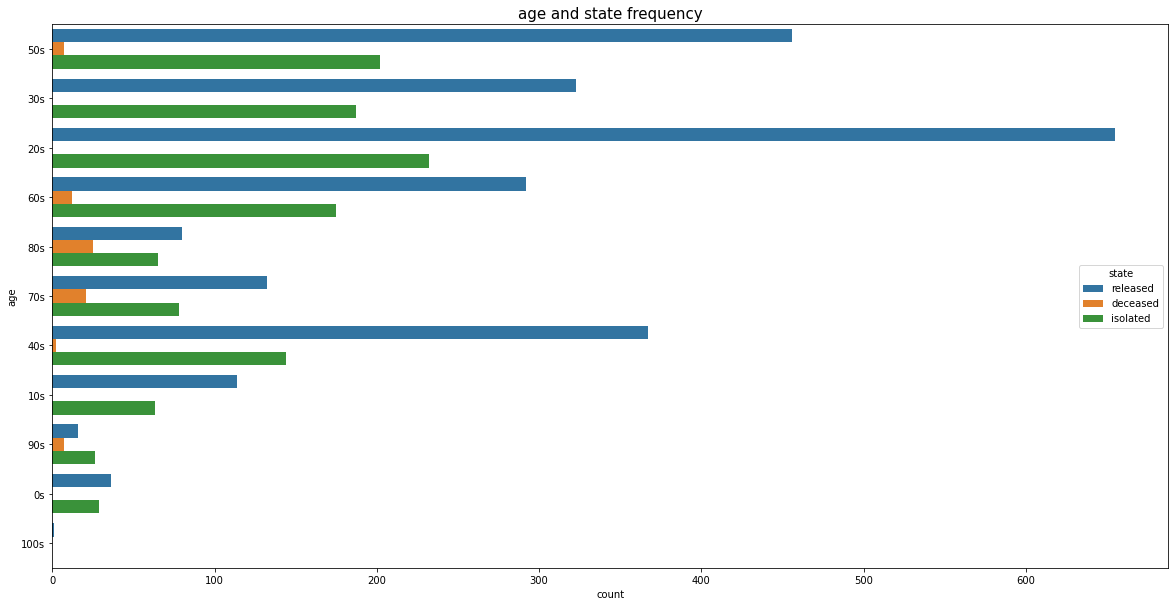

In [16]:
plt.figure(figsize=(20,10))
plt.title('age and state frequency',fontsize = 15)
sns.countplot(y='age', hue='state', data = Patient_df)

In [17]:
Patient_df['deceased_days'] = (Patient_df['deceased_date'] - Patient_df['confirmed_date']).dt.days
Patient_df['released_days'] = (Patient_df['released_date'] - Patient_df['confirmed_date']).dt.days
print(f'Average Recovery Time: {round(Patient_df["released_days"].mean(),2)} days')
print(f'Average Deceased Time: {round(Patient_df["deceased_days"].mean(),2)} days')
print(f"Average no of days till confirmed COVID: {np.mean(Patient_df['confirmed_date'] - Patient_df['symptom_onset_date'])}")
print(f"Average no of days till release: {np.mean(Patient_df['released_date'] - Patient_df['confirmed_date'])}")
print(f"Average no of days till death: {np.mean(Patient_df['deceased_date'] - Patient_df['confirmed_date'])}")

Average Recovery Time: 24.74 days
Average Deceased Time: 11.03 days
Average no of days till confirmed COVID: 4 days 12:34:41.167883211
Average no of days till release: 24 days 17:40:05.340114431
Average no of days till death: 11 days 00:44:18.461538461


In [18]:
Patient_df['confirmed_date'] = pd.DatetimeIndex(Patient_df['confirmed_date']).month

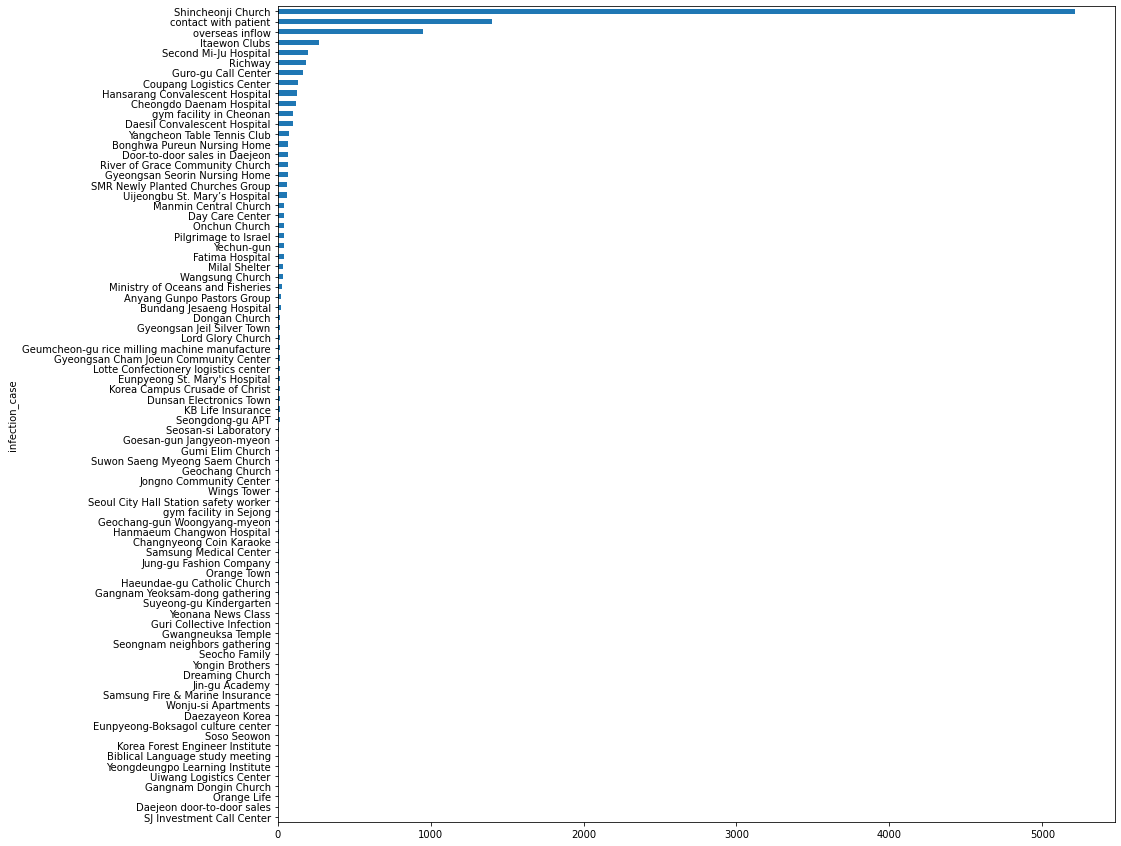

In [19]:
Case_df.groupby('infection_case')['confirmed'].sum().sort_values().plot(kind='barh', figsize=(15,15))

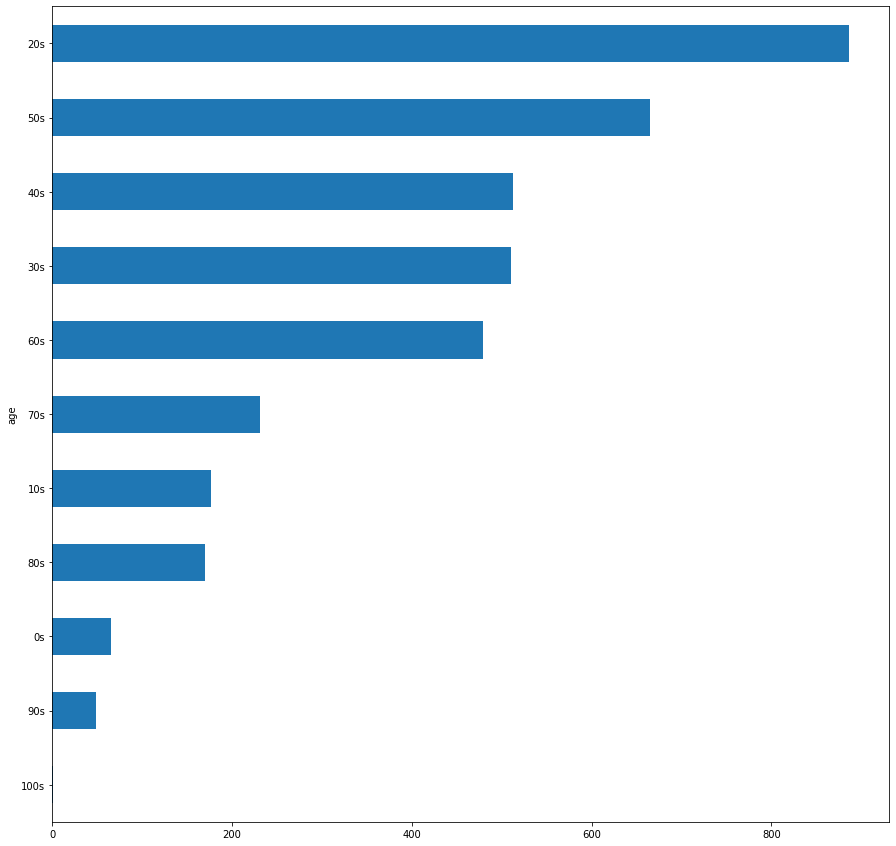

In [20]:
Patient_df.groupby(['age'])['patient_id'].count().sort_values().plot(kind='barh', figsize=(15,15))

In [21]:
print(TimeProvince_df.dtypes, TimeGender_df.dtypes, TimeAge_df.dtypes)

date         object
time          int64
province     object
confirmed     int64
released      int64
deceased      int64
dtype: object date         datetime64[ns]
time                  int64
sex                  object
confirmed             int64
deceased              int64
dtype: object date         object
time          int64
age          object
confirmed     int64
deceased      int64
dtype: object


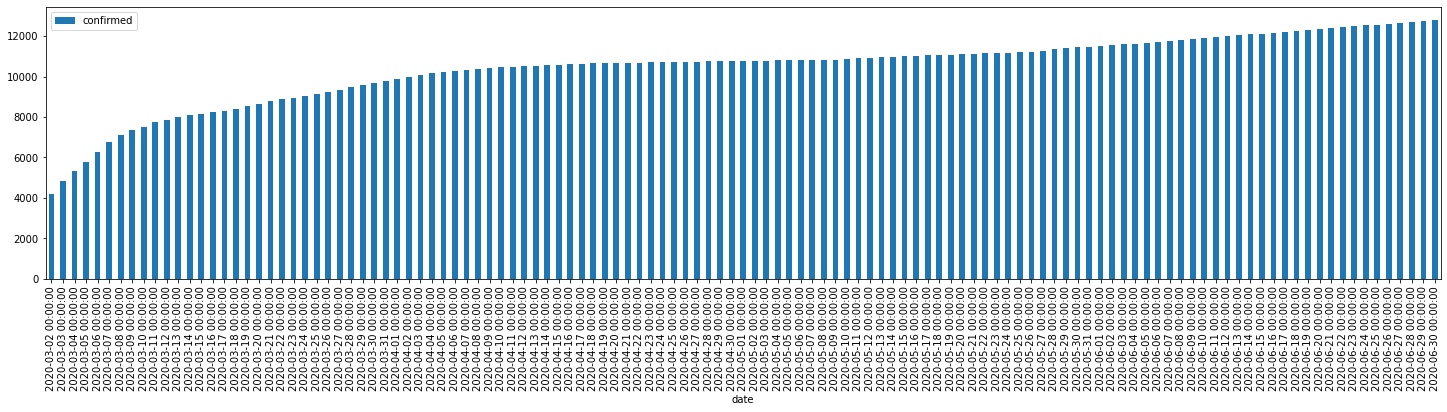

In [22]:
TimeAge_df['date'] = pd.to_datetime(TimeAge_df['date'], format='%Y-%m-%d')

df_daily = TimeAge_df.groupby('date')['confirmed'].sum().reset_index()
df_daily.plot(x='date', y='confirmed', kind="bar", figsize=(25,5))


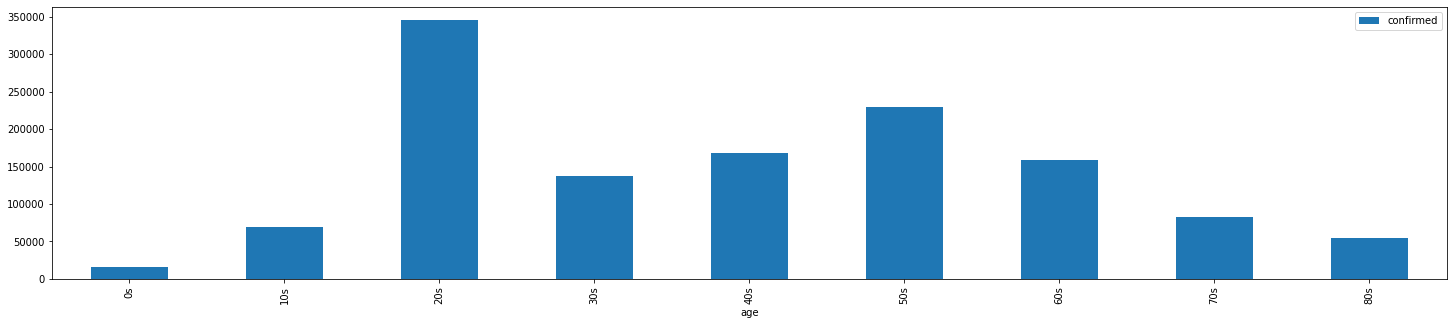

In [23]:
df_daily = TimeAge_df.groupby('age')['confirmed'].sum().reset_index()
df_daily.plot(x='age', y='confirmed', kind="bar", figsize=(25,5))

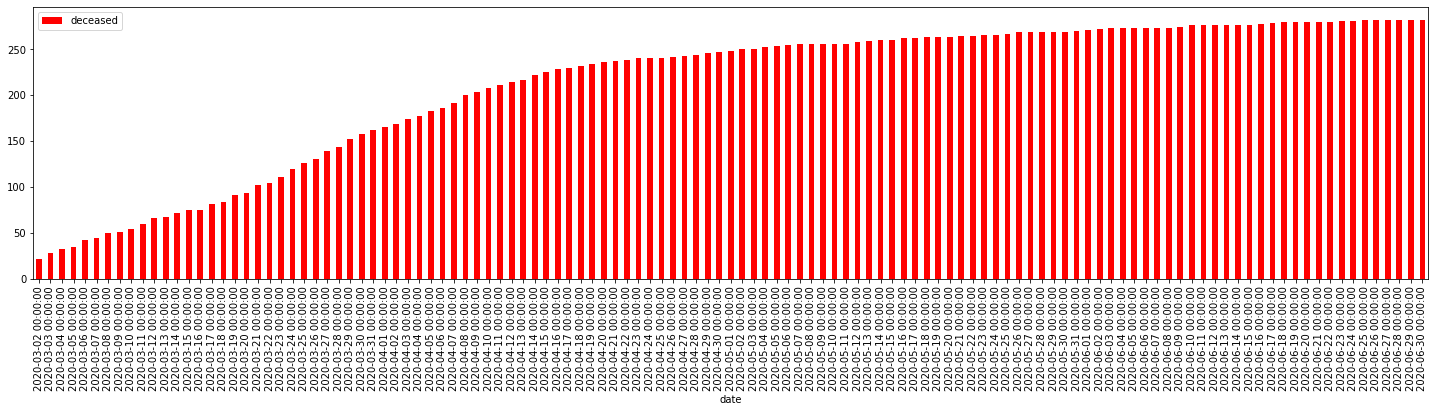

In [24]:
df_daily = TimeAge_df.groupby('date')['deceased'].sum().reset_index()
df_daily.plot(x='date', y='deceased',kind="bar", color="red", figsize=(25,5))

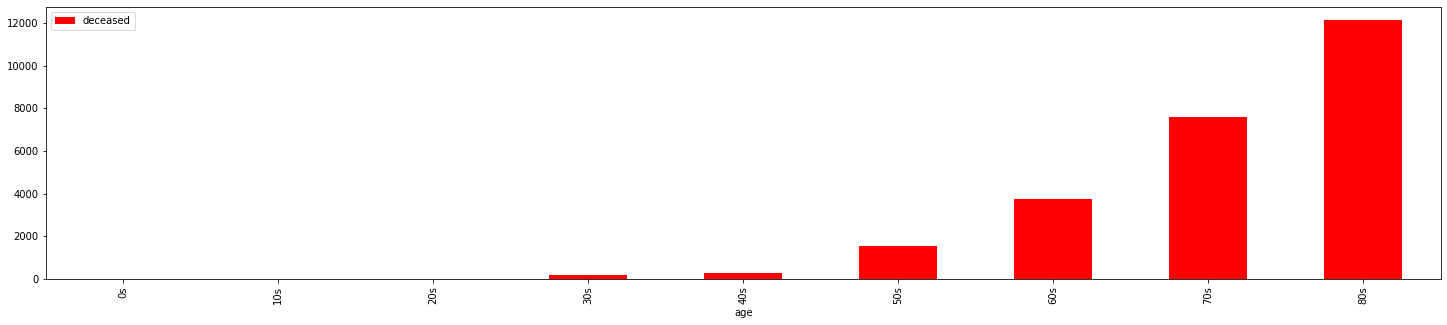

In [25]:
df_daily = TimeAge_df.groupby('age')['deceased'].sum().reset_index()
df_daily.plot(x='age', y='deceased', kind="bar",color="red", figsize=(25,5))

In [26]:
TimeAge_df

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


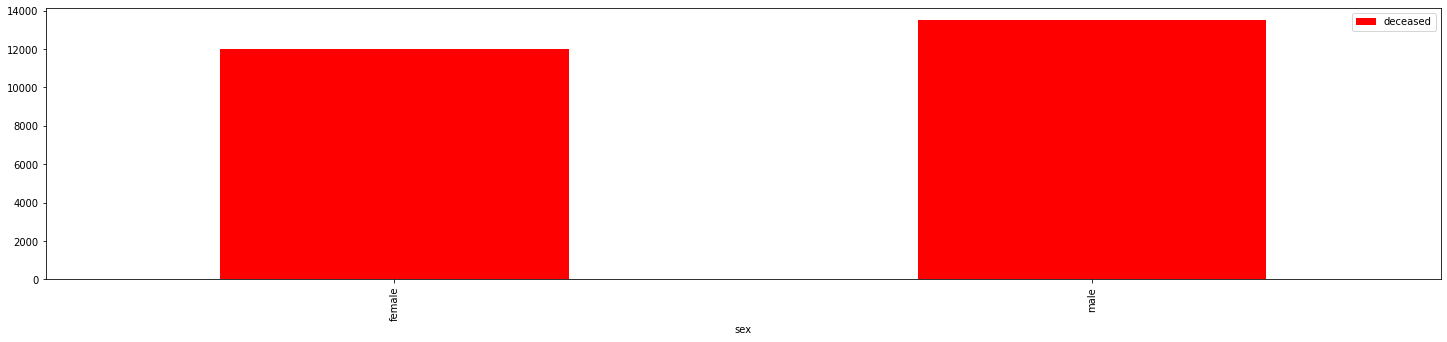

In [27]:
TimeGender_df['date'] = pd.to_datetime(TimeGender_df['date'], format='%Y-%m-%d')

df_daily = TimeGender_df.groupby('sex')['deceased'].sum().reset_index()
df_daily.plot(x='sex', y='deceased', kind="bar", color="red", figsize=(25,5))

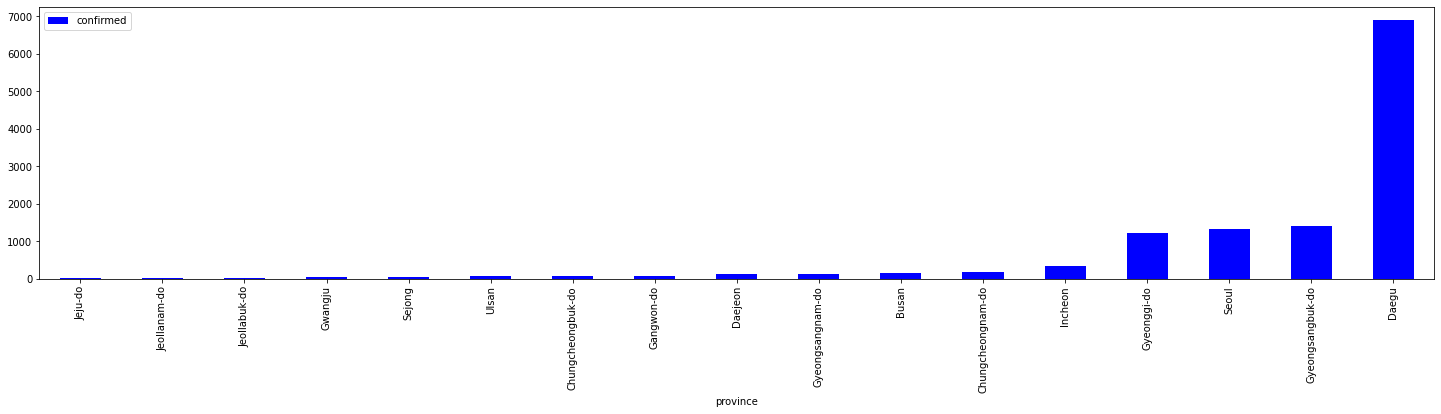

In [28]:
TimeProvince_df['date'] = pd.to_datetime(TimeProvince_df['date'], format='%Y-%m-%d')

df_daily = TimeProvince_df.groupby('province')['confirmed'].max().sort_values().reset_index()
df_daily.plot(x='province', y='confirmed', kind="bar", color="blue", figsize=(25,5))


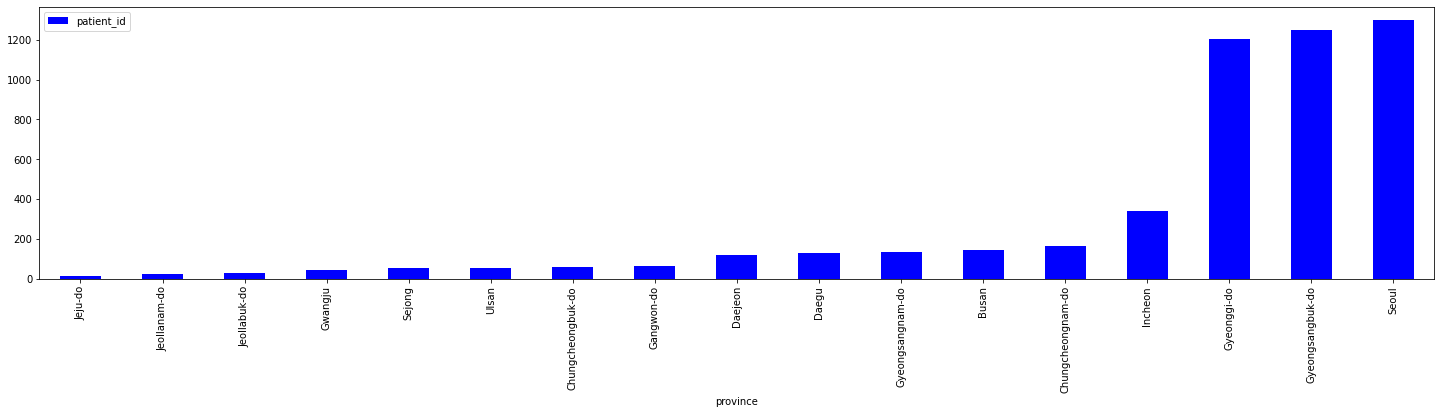

In [29]:
patient_dfdf = Patient_df.groupby('province')['patient_id'].size().sort_values().reset_index()
patient_dfdf.plot(x='province', y='patient_id', kind="bar", color="blue", figsize=(25,5))

In [30]:
SeoulFloating_df['date'] = pd.to_datetime(SeoulFloating_df['date'], format='%Y-%m-%d')
SeoulFloating_df

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [31]:
floating = pd.DataFrame(SeoulFloating_df.groupby(['date'])['fp_num'].sum())
floating

,fp_num
date,
2020-01-01,192406170
2020-01-02,202929360
2020-01-03,203337150
2020-01-04,197396050
2020-01-05,195747670
...,...
2020-05-27,199293080
2020-05-28,199209840
2020-05-29,140847320


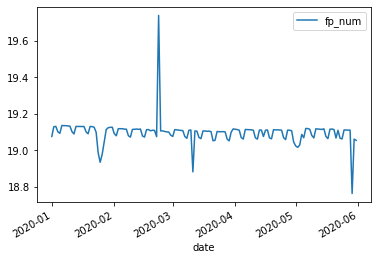

In [32]:
floating['fp_num'] = np.log(floating.fp_num)
floating.plot()

In [33]:
floating.idxmax() # date in which its causing the spike

fp_num   2020-02-23
dtype: datetime64[ns]

In [34]:
SeoulFloating_df_investigation = SeoulFloating_df.loc[SeoulFloating_df['date'] == "2020-02-23"]
SeoulFloating_df_investigation.groupby(['city'])['fp_num'].sum()

city
Dobong-gu          11644040
Dongdaemun-gu      13519710
Dongjag-gu         14973890
Eunpyeong-gu       16915610
Gangbuk-gu         11871100
Gangdong-gu        16304330
Gangnam-gu         22079620
Gangseo-gu         21131690
Geumcheon-gu        9618100
Guro-gu            16582310
Gwanak-gu          19802120
Gwangjin-gu        13911300
Jongno-gu           7346080
Jung-gu             6283660
Jungnang-gu        14750680
Mapo-gu            15161170
Nowon-gu           19767110
Seocho-gu          16097810
Seodaemun-gu       11796160
Seongbuk-gu        16399710
Seongdong-gu       11168220
Songpa-gu          23917450
Yangcheon-gu       16273520
Yeongdeungpo-gu    16419310
Yongsan-gu          9352850
Name: fp_num, dtype: int64

In [35]:
SeoulFloating_df_investigation.groupby(['birth_year'])['fp_num'].sum()

birth_year
20    68317330
30    75618000
40    75213860
50    72242970
60    46625190
70    35070200
Name: fp_num, dtype: int64

In [36]:
SeoulFloating_df_investigation.groupby(['hour'])['fp_num'].sum()

hour
0     15864660
1     15839100
2     15806940
3     15763980
4     15726440
5     15691230
6     15659730
7     15667230
8     15738290
9     15793870
10    15845080
11     7929560
12    15792310
13    15837230
14    15860820
15    15899330
16    15956210
17    16013300
18    16060730
19    16087610
20    16096140
21    16083710
22    16054350
23    16019700
Name: fp_num, dtype: int64

In [37]:
SeoulFloating_df_investigation.groupby(['sex'])['fp_num'].sum()

sex
female    191451940
male      181635610
Name: fp_num, dtype: int64

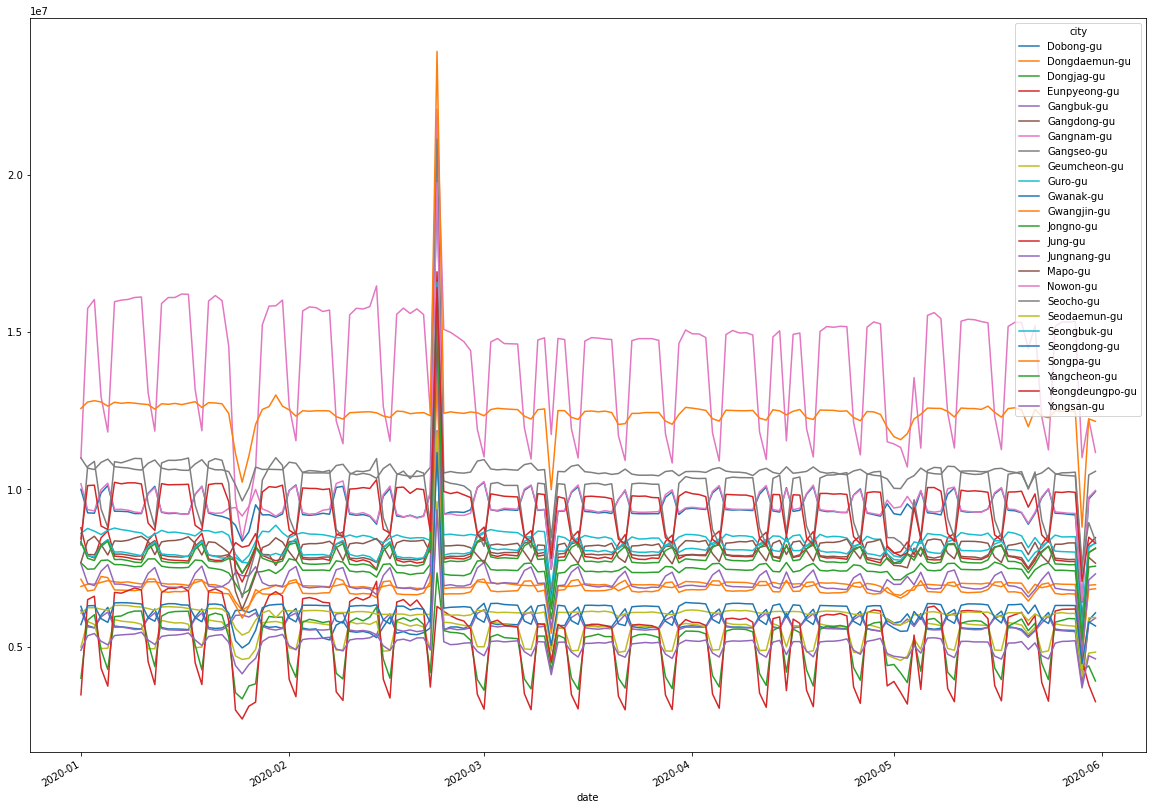

In [38]:
seoul_city = SeoulFloating_df.groupby(['city','date'])['fp_num'].sum().reset_index()
seoul_city = pd.DataFrame(seoul_city).set_index('date').pivot(columns = 'city', values = 'fp_num')
seoul_city.plot(figsize=(20,15))

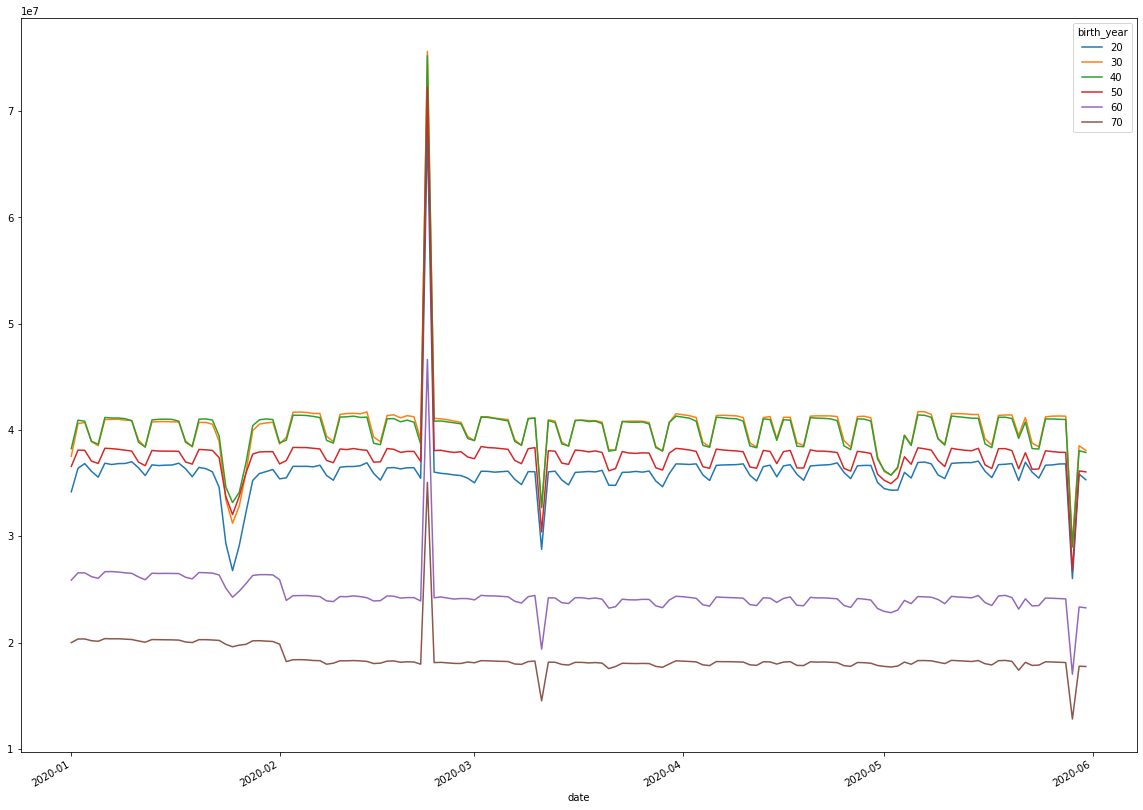

In [39]:
seoul_city_birth_year = SeoulFloating_df.groupby(['birth_year','date'])['fp_num'].sum().reset_index()
seoul_city_birth_year = pd.DataFrame(seoul_city_birth_year).set_index('date').pivot(columns = 'birth_year', values = 'fp_num')
seoul_city_birth_year.plot(figsize=(20,15))

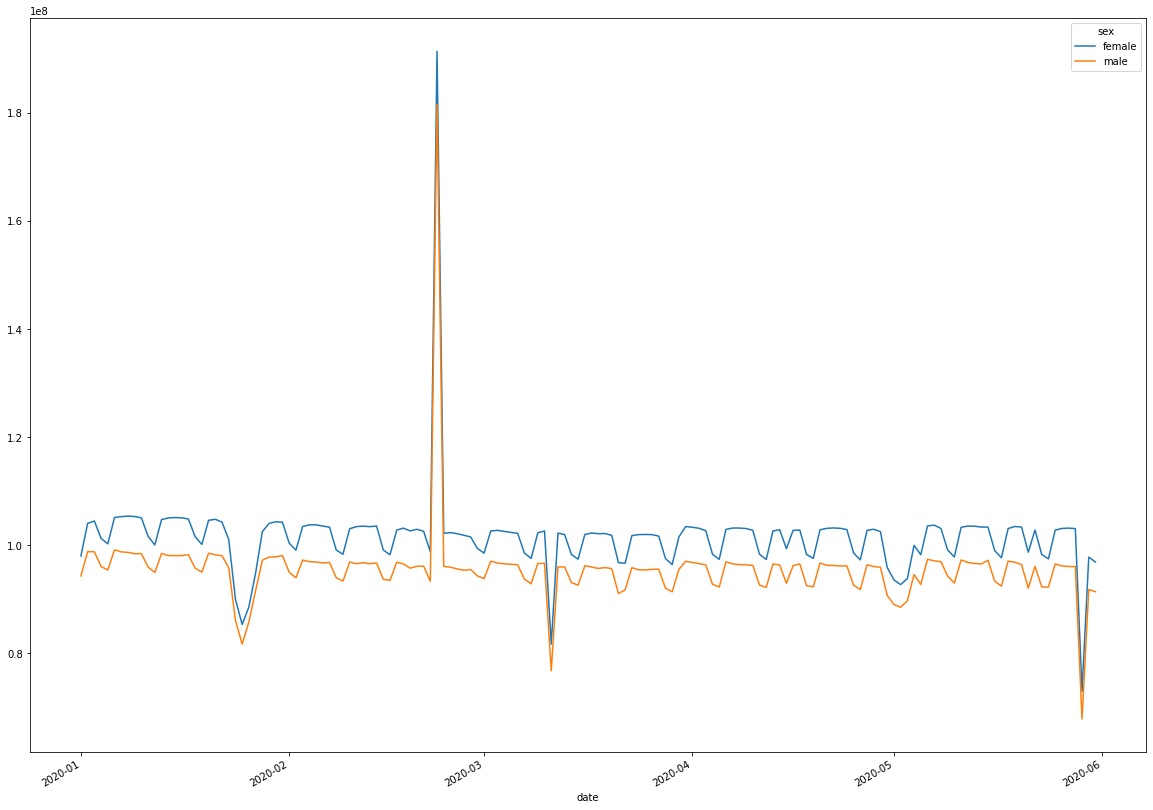

In [40]:
seoul_city_sex = SeoulFloating_df.groupby(['sex','date'])['fp_num'].sum().reset_index()
seoul_city_sex = pd.DataFrame(seoul_city_sex).set_index('date').pivot(columns = 'sex', values = 'fp_num')
seoul_city_sex.plot(figsize=(20,15))

In [41]:
province_group = TimeProvince_df.groupby('province').agg({'confirmed':'max','released':'max','deceased':'max'}).reset_index()
province_group

,province,confirmed,released,deceased
0,Busan,154,143,3
1,Chungcheongbuk-do,65,60,0
2,Chungcheongnam-do,167,150,0
3,Daegu,6906,6700,189
4,Daejeon,117,44,1
5,Gangwon-do,65,54,3
6,Gwangju,44,32,0
7,Gyeonggi-do,1207,931,23
8,Gyeongsangbuk-do,1389,1328,54
9,Gyeongsangnam-do,134,128,0


In [42]:
Region_df

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [43]:
Region_group = Region_df.groupby('province').agg({'elementary_school_count':'sum','kindergarten_count':'sum','university_count':'sum','academy_ratio':'mean','elderly_population_ratio':'mean','elderly_alone_ratio':'mean','nursing_home_count':'sum'}).reset_index()
Region_group = Region_group.loc[Region_group['province'] != "Korea"] # removing korea from province
Region_group

,province,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,Busan,608,816,44,1.327647,19.357647,9.094118,13504
1,Chungcheongbuk-do,518,656,34,1.023333,23.192500,11.825000,5538
2,Chungcheongnam-do,818,998,42,1.122500,23.844375,11.706250,7282
3,Daegu,458,710,22,1.713333,17.031111,7.966667,10166
4,Daejeon,296,520,30,1.425000,14.376667,6.200000,5968
5,Gangwon-do,698,736,36,1.116842,22.890526,11.578947,5038
6,Gwangju,310,624,34,2.473333,14.815000,6.716667,5704
7,Gyeonggi-do,2554,4474,122,1.420625,14.429688,6.084375,40982
8,Gyeongsangbuk-do,942,1414,66,0.948750,27.556250,15.133333,8948
9,Gyeongsangnam-do,1002,1372,42,1.363158,24.749474,14.721053,10728


In [44]:
merged_inner = pd.merge(left=Region_group, right=province_group, left_on='province', right_on='province')
merged_inner

,province,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,confirmed,released,deceased
0,Busan,608,816,44,1.327647,19.357647,9.094118,13504,154,143,3
1,Chungcheongbuk-do,518,656,34,1.023333,23.192500,11.825000,5538,65,60,0
2,Chungcheongnam-do,818,998,42,1.122500,23.844375,11.706250,7282,167,150,0
3,Daegu,458,710,22,1.713333,17.031111,7.966667,10166,6906,6700,189
4,Daejeon,296,520,30,1.425000,14.376667,6.200000,5968,117,44,1
5,Gangwon-do,698,736,36,1.116842,22.890526,11.578947,5038,65,54,3
6,Gwangju,310,624,34,2.473333,14.815000,6.716667,5704,44,32,0
7,Gyeonggi-do,2554,4474,122,1.420625,14.429688,6.084375,40982,1207,931,23
8,Gyeongsangbuk-do,942,1414,66,0.948750,27.556250,15.133333,8948,1389,1328,54
9,Gyeongsangnam-do,1002,1372,42,1.363158,24.749474,14.721053,10728,134,128,0


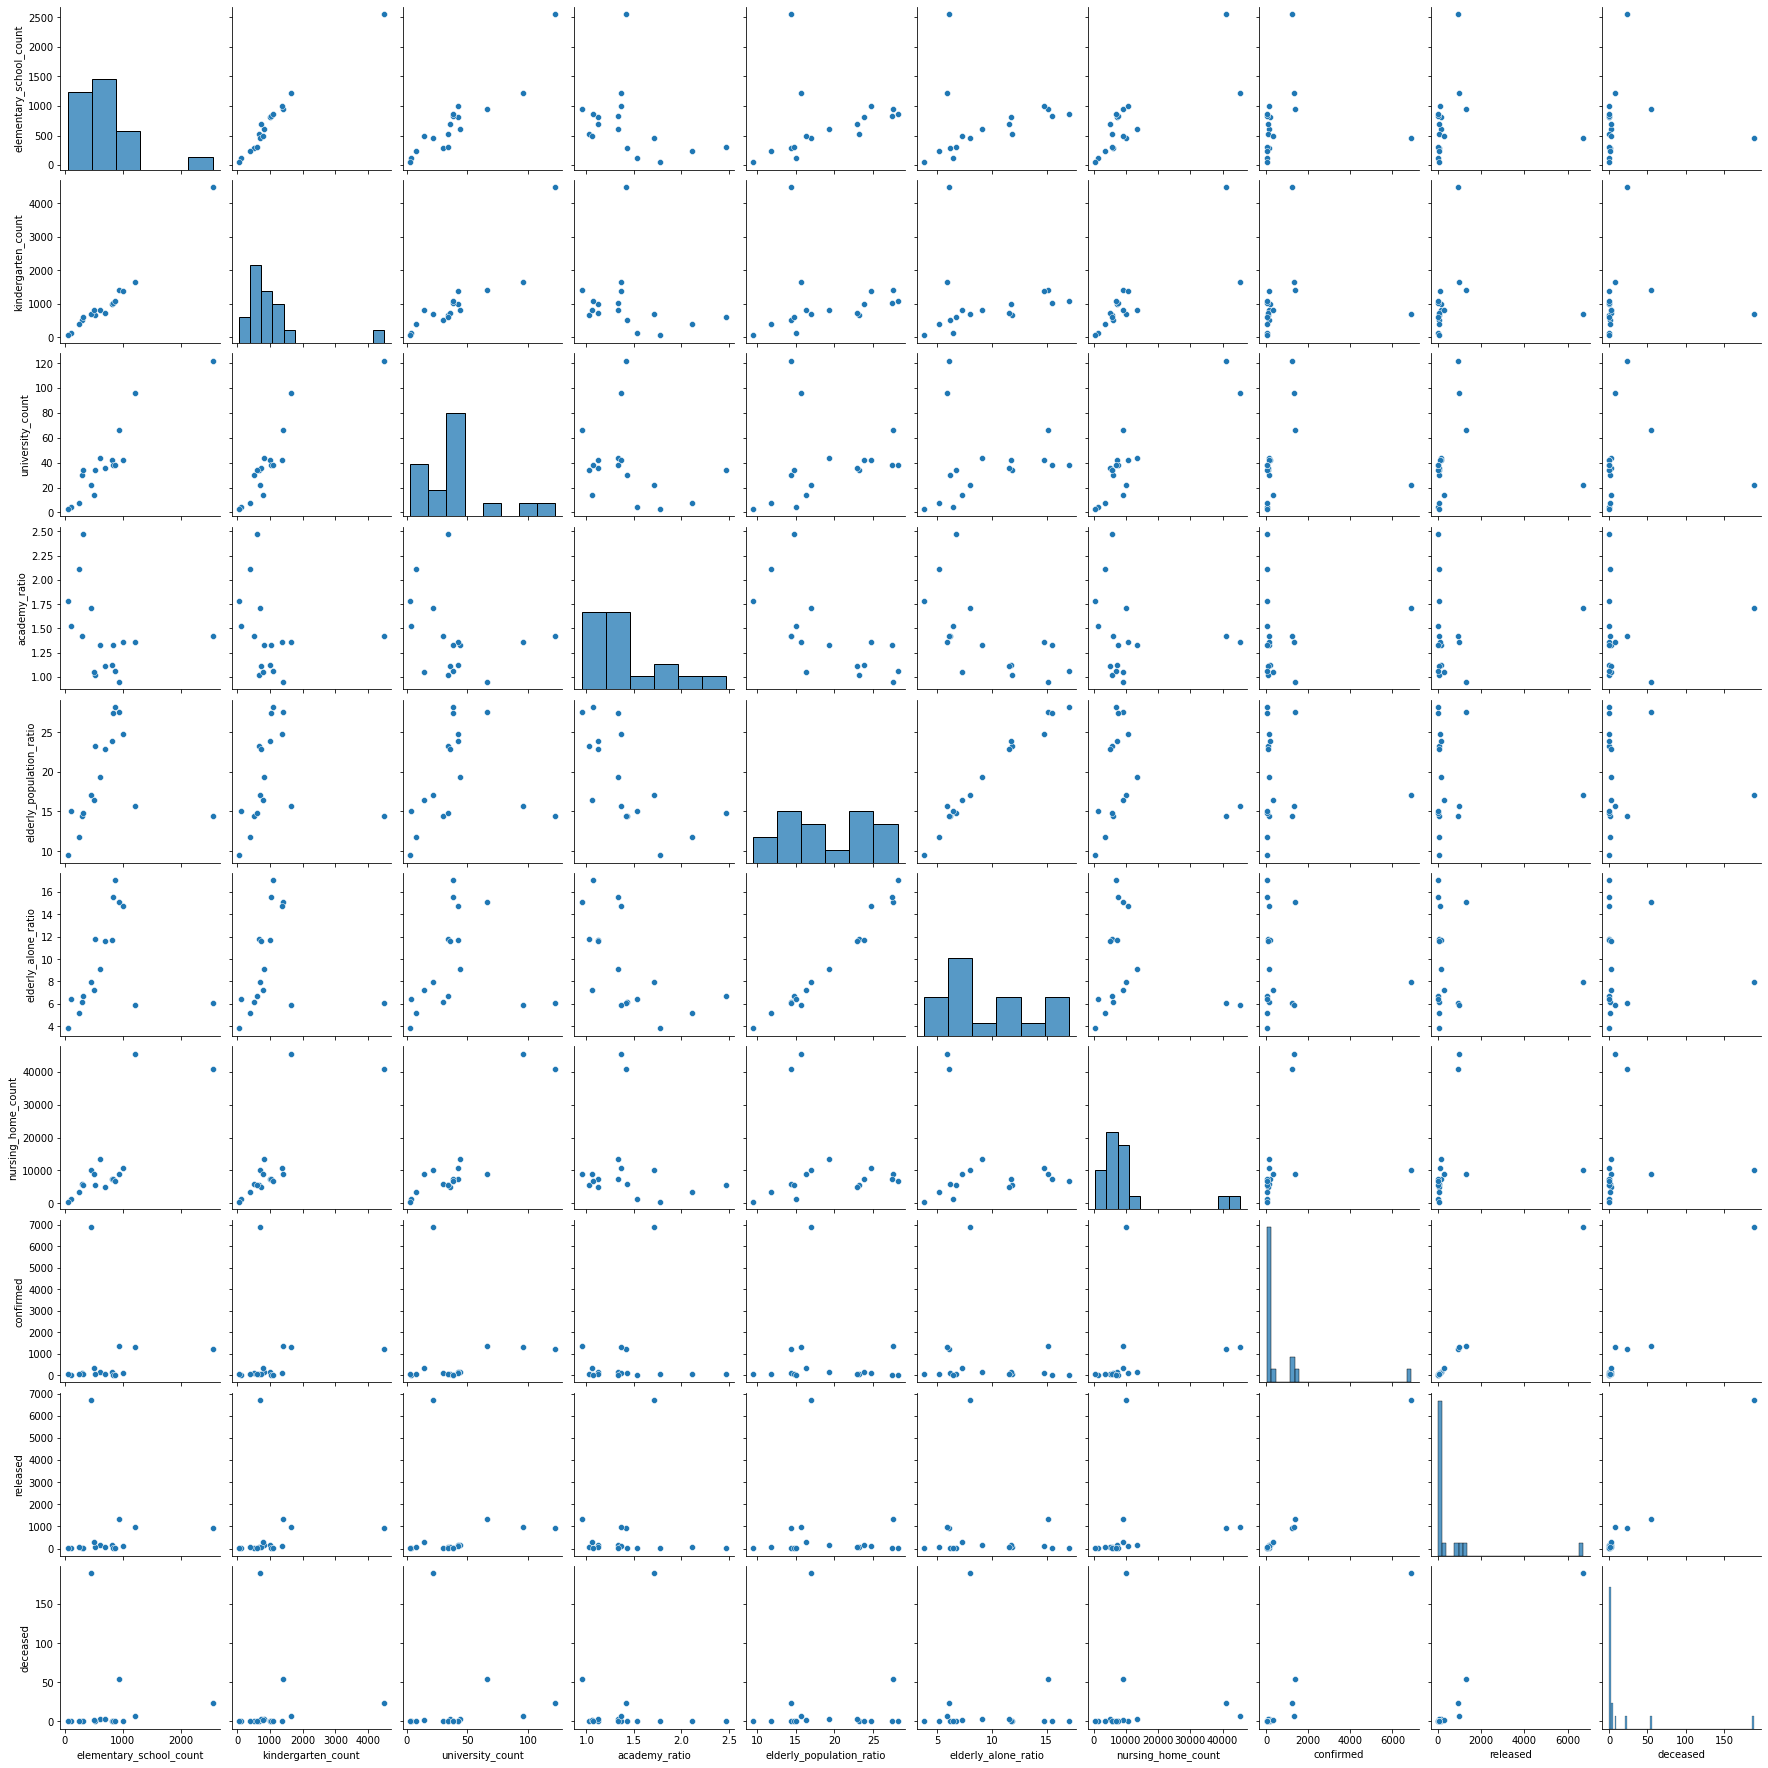

In [45]:
sns.pairplot(merged_inner)

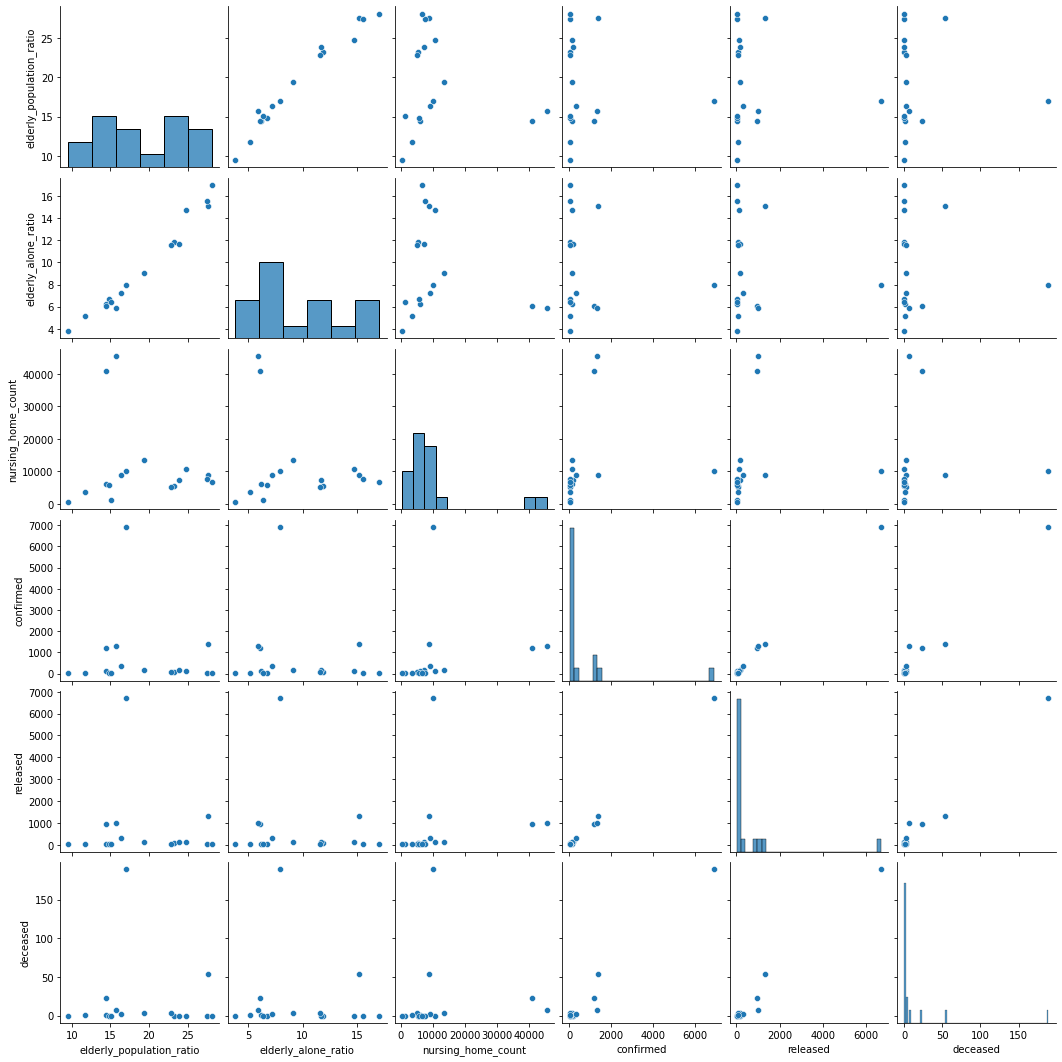

In [46]:
merged_inner_elderly = merged_inner[['elderly_population_ratio', 'elderly_alone_ratio','nursing_home_count','confirmed', 'released', 'deceased']]
sns.pairplot(merged_inner_elderly) #we need the total population for each province to normalise the confirmed, deceased and released so that we can do a meaningful correlation

In [47]:
Time_df['date'] = pd.to_datetime(Time_df['date'], format='%Y-%m-%d')
Weather_df['date'] = pd.to_datetime(Weather_df['date'], format='%Y-%m-%d')
TimeProvince_df['date'] = pd.to_datetime(TimeProvince_df['date'], format='%Y-%m-%d')
Time_df

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [48]:
Weather_df_seoul = Weather_df.loc[Weather_df['province'] == "Seoul"] 
Weather_df_seoul.groupby('date').mean()

,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
date,,,,,,,,
2016-01-01,10000,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
2016-01-02,10000,5.7,1.0,9.5,0.0,4.5,320.0,76.9
2016-01-03,10000,6.5,5.1,9.4,0.0,4.0,320.0,80.6
2016-01-04,10000,2.0,-2.5,5.3,0.0,5.1,320.0,54.4
2016-01-05,10000,-2.7,-4.8,1.5,0.0,4.6,20.0,39.4
...,...,...,...,...,...,...,...,...
2020-06-25,10000,21.6,20.1,23.4,13.3,4.3,180.0,91.0
2020-06-26,10000,21.8,19.2,25.7,2.1,5.3,230.0,82.1
2020-06-27,10000,24.1,20.4,29.6,0.0,5.4,250.0,70.4


In [49]:
seoul_groupby = pd.DataFrame(SeoulFloating_df.groupby('date')['fp_num'].sum())
seoul_groupby['fp_num'] = np.log(seoul_groupby.fp_num)
seoul_groupby

,fp_num
date,
2020-01-01,19.075119
2020-01-02,19.128368
2020-01-03,19.130376
2020-01-04,19.100723
2020-01-05,19.092337
...,...
2020-05-27,19.110287
2020-05-28,19.109869
2020-05-29,18.763187


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



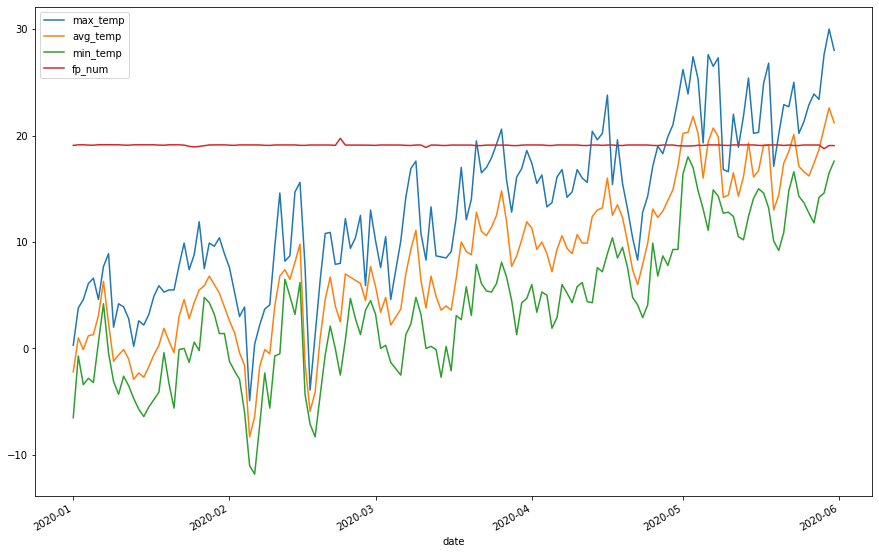

In [50]:
merged_inner = pd.merge(left=Weather_df_seoul, right=seoul_groupby, left_on='date', right_on='date')
merged_inner_temp_pop = merged_inner[['date','max_temp','avg_temp', 'min_temp','fp_num']]
merged_inner_temp_pop['date'] = pd.to_datetime(merged_inner_temp_pop['date'], format='%Y-%m-%d')
plt.rcParams["figure.figsize"] = (15, 10)
merged_inner_temp_pop.plot(x="date", y=["max_temp", "avg_temp", 'min_temp',"fp_num"], kind = 'line')

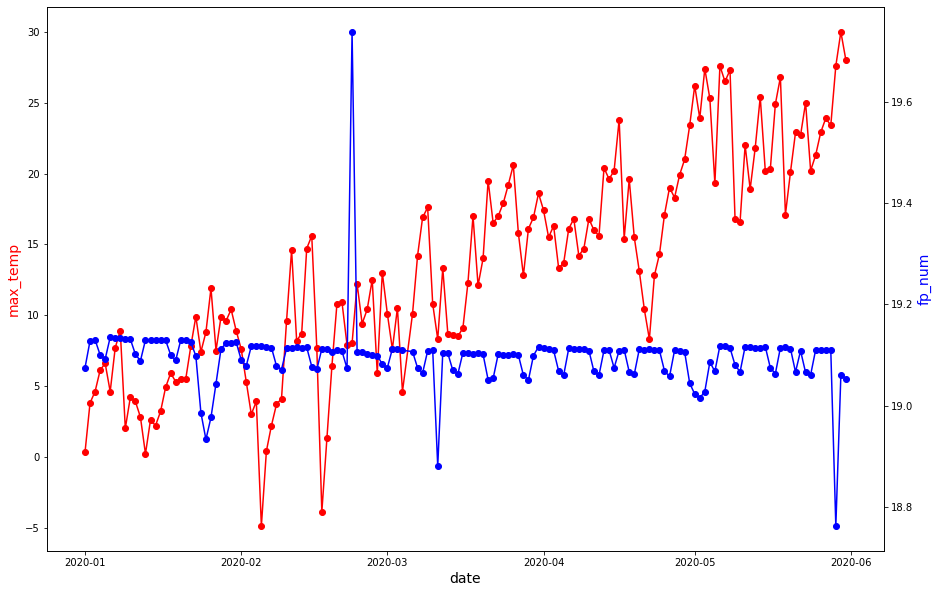

In [51]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(merged_inner_temp_pop.date, merged_inner_temp_pop.max_temp, color="red", marker="o")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("max_temp",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merged_inner_temp_pop.date, merged_inner_temp_pop["fp_num"],color="blue",marker="o")
ax2.set_ylabel("fp_num",color="blue",fontsize=14)
plt.show()

In [52]:
TimeProvince_df
province_date_group = TimeProvince_df.groupby(['date','province']).agg({'confirmed':'sum','released':'sum','deceased':'sum'}).reset_index()
province_date_group

,date,province,confirmed,released,deceased
0,2020-01-20,Busan,0,0,0
1,2020-01-20,Chungcheongbuk-do,0,0,0
2,2020-01-20,Chungcheongnam-do,0,0,0
3,2020-01-20,Daegu,0,0,0
4,2020-01-20,Daejeon,0,0,0
...,...,...,...,...,...
2766,2020-06-30,Jeollabuk-do,27,21,0
2767,2020-06-30,Jeollanam-do,24,19,0
2768,2020-06-30,Sejong,50,47,0
2769,2020-06-30,Seoul,1312,985,7


In [53]:
weather_df_group = Weather_df.groupby(['date','province']).mean()
weather_df_group = weather_df_group[['avg_temp','min_temp','max_temp','max_wind_speed']].reset_index()
weather_df_group

,date,province,avg_temp,min_temp,max_temp,max_wind_speed
0,2016-01-01,Busan,5.3,1.1,10.9,7.4
1,2016-01-01,Chungcheongbuk-do,-1.0,-5.9,4.1,1.6
2,2016-01-01,Chungcheongnam-do,2.6,-4.4,7.5,4.6
3,2016-01-01,Daegu,1.7,-4.0,8.0,3.7
4,2016-01-01,Daejeon,1.6,-4.2,7.7,4.4
...,...,...,...,...,...,...
26266,2020-06-29,Jeju-do,23.2,19.1,27.6,12.8
26267,2020-06-29,Jeollabuk-do,22.0,19.7,26.5,4.4
26268,2020-06-29,Jeollanam-do,21.9,20.0,24.0,16.8
26269,2020-06-29,Seoul,23.8,20.6,26.5,5.9


In [54]:
new_df = pd.merge(province_date_group, weather_df_group,  how='left', left_on=['date','province'], right_on = ['date','province'])
new_df

,date,province,confirmed,released,deceased,avg_temp,min_temp,max_temp,max_wind_speed
0,2020-01-20,Busan,0,0,0,5.1,1.6,9.8,6.1
1,2020-01-20,Chungcheongbuk-do,0,0,0,0.9,-2.9,5.8,5.6
2,2020-01-20,Chungcheongnam-do,0,0,0,1.7,-2.7,7.1,6.2
3,2020-01-20,Daegu,0,0,0,4.6,2.4,8.1,6.4
4,2020-01-20,Daejeon,0,0,0,3.4,-0.9,8.1,5.5
...,...,...,...,...,...,...,...,...,...
2766,2020-06-30,Jeollabuk-do,27,21,0,NaN,NaN,NaN,NaN
2767,2020-06-30,Jeollanam-do,24,19,0,NaN,NaN,NaN,NaN
2768,2020-06-30,Sejong,50,47,0,NaN,NaN,NaN,NaN
2769,2020-06-30,Seoul,1312,985,7,NaN,NaN,NaN,NaN


In [55]:
seoul_new_df = new_df.loc[new_df['province'] == "Seoul"] 
Jeollabuk_do_new_df = new_df.loc[new_df['province'] == "Jeollabuk-do"] 
seoul_new_df_sns = seoul_new_df[['date','confirmed','avg_temp']]

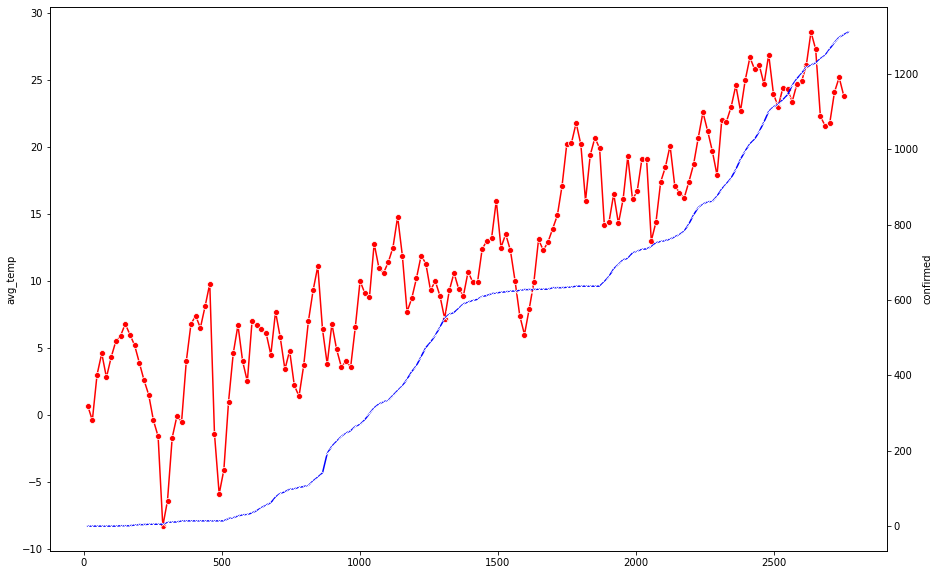

In [56]:
sns.lineplot(data=seoul_new_df_sns.avg_temp, color="r",marker="o")
ax2 = plt.twinx()
sns.lineplot(data=seoul_new_df_sns.confirmed, color="b", ax=ax2, marker="x")

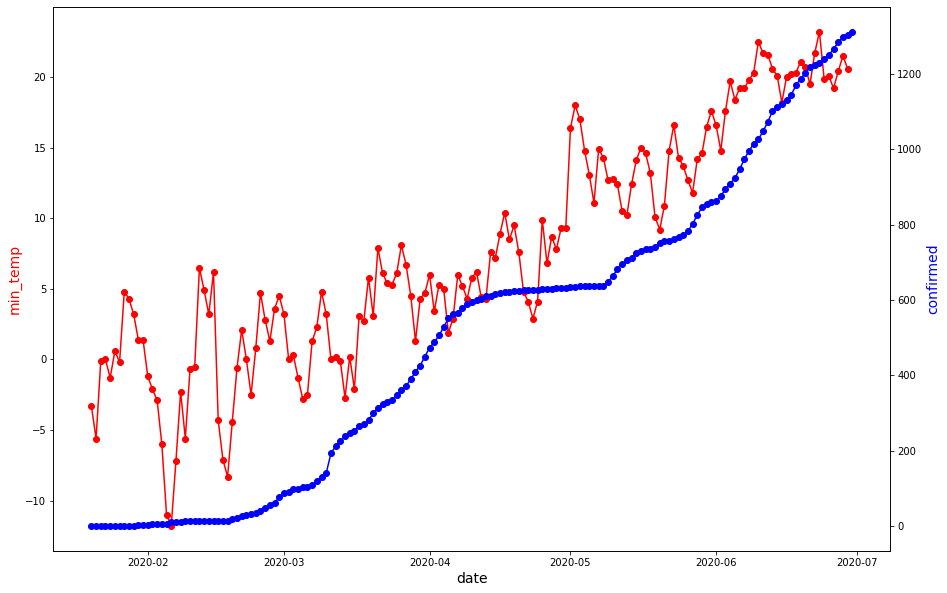

In [57]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(seoul_new_df.date, seoul_new_df.min_temp, color="red", marker="o")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("min_temp",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(seoul_new_df.date, seoul_new_df["confirmed"],color="blue",marker="o")
ax2.set_ylabel("confirmed",color="blue",fontsize=14)
plt.show()


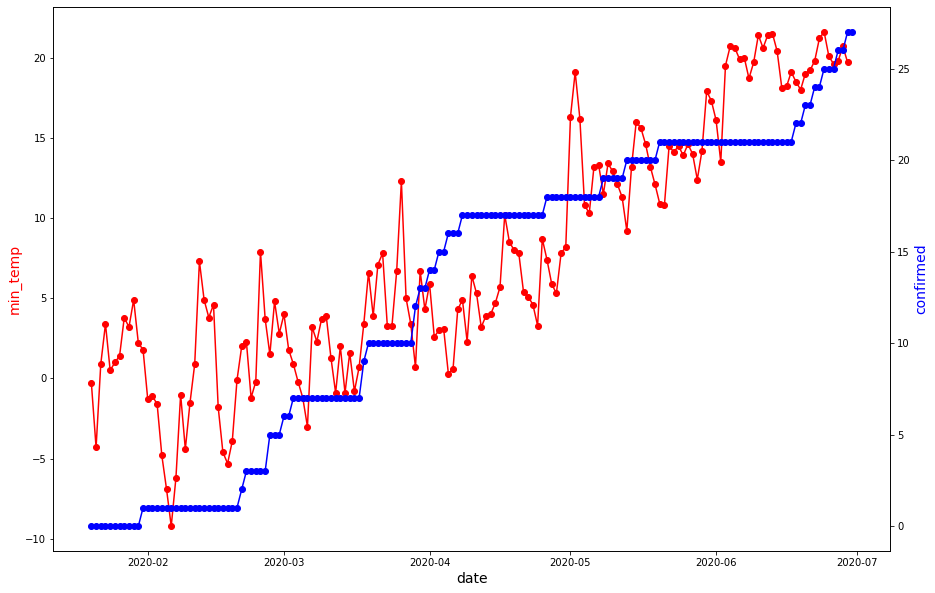

In [58]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(Jeollabuk_do_new_df.date, Jeollabuk_do_new_df.min_temp, color="red", marker="o")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("min_temp",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Jeollabuk_do_new_df.date, Jeollabuk_do_new_df["confirmed"],color="blue",marker="o")
ax2.set_ylabel("confirmed",color="blue",fontsize=14)
plt.show()

In [59]:
new_df

,date,province,confirmed,released,deceased,avg_temp,min_temp,max_temp,max_wind_speed
0,2020-01-20,Busan,0,0,0,5.1,1.6,9.8,6.1
1,2020-01-20,Chungcheongbuk-do,0,0,0,0.9,-2.9,5.8,5.6
2,2020-01-20,Chungcheongnam-do,0,0,0,1.7,-2.7,7.1,6.2
3,2020-01-20,Daegu,0,0,0,4.6,2.4,8.1,6.4
4,2020-01-20,Daejeon,0,0,0,3.4,-0.9,8.1,5.5
...,...,...,...,...,...,...,...,...,...
2766,2020-06-30,Jeollabuk-do,27,21,0,NaN,NaN,NaN,NaN
2767,2020-06-30,Jeollanam-do,24,19,0,NaN,NaN,NaN,NaN
2768,2020-06-30,Sejong,50,47,0,NaN,NaN,NaN,NaN
2769,2020-06-30,Seoul,1312,985,7,NaN,NaN,NaN,NaN


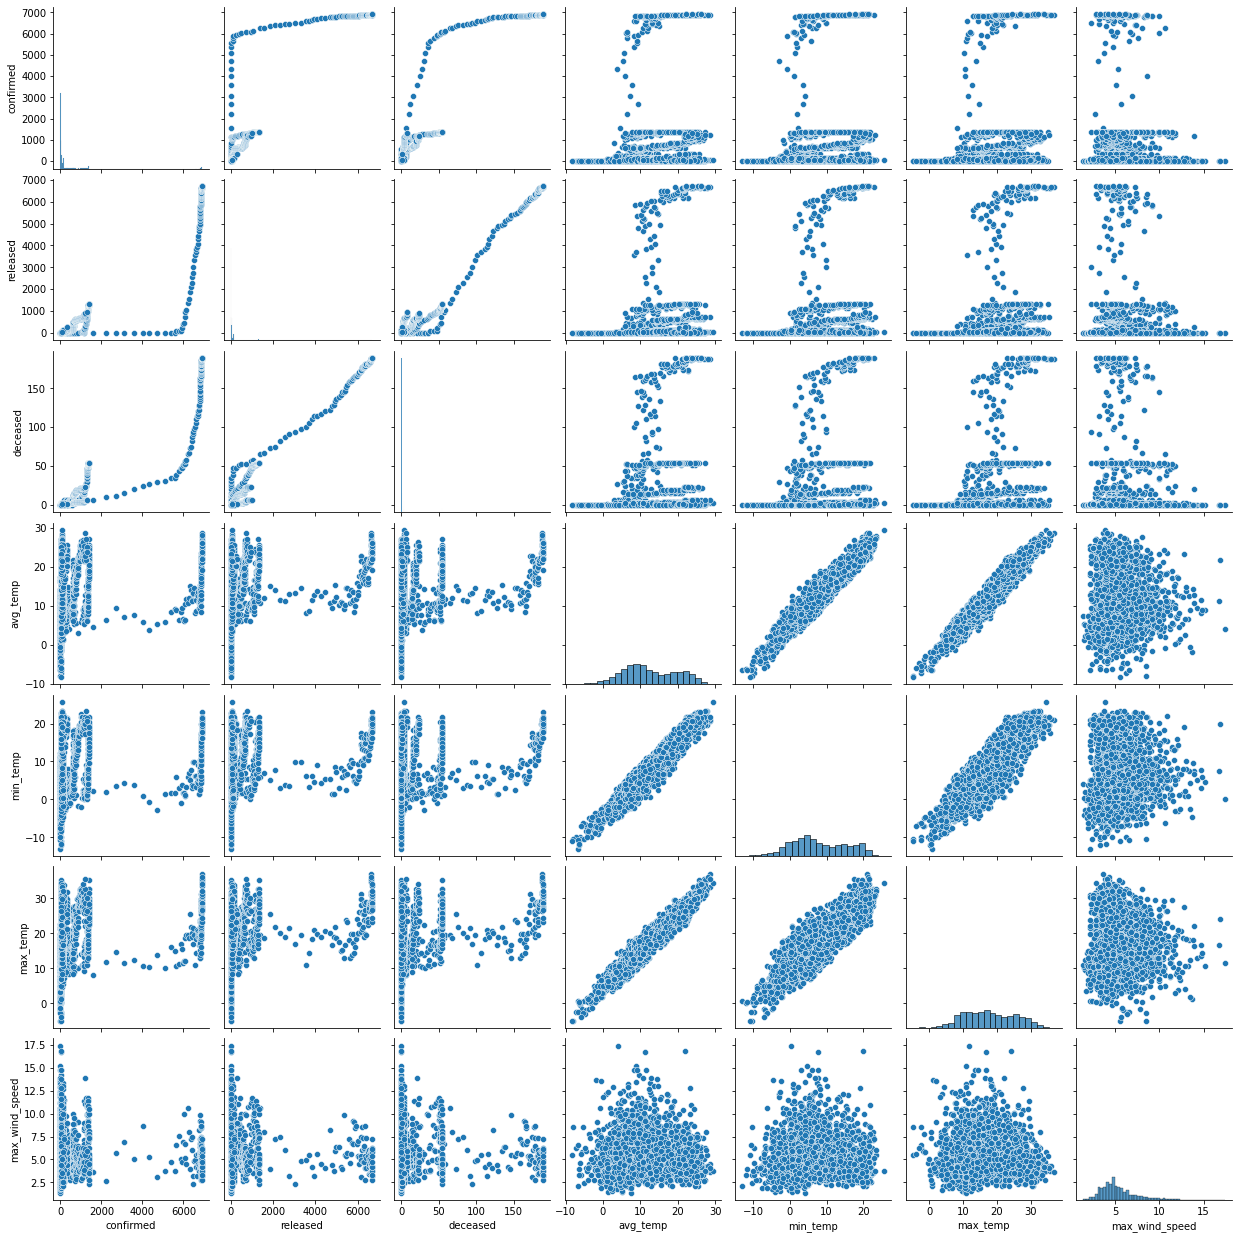

In [60]:
sns.pairplot(new_df)

In [61]:
all_df_new = new_df.groupby(['date']).agg({'confirmed':'sum','released':'sum','deceased':'sum','avg_temp':'mean','max_temp':'mean','min_temp':'mean','max_wind_speed':'mean'}).reset_index()
all_df_new['log_confirmed']= np.log(all_df_new['confirmed'])
all_df_new['log_released']= np.log(all_df_new['released'])
all_df_new['log_deceased']= np.log(all_df_new['deceased'])
all_df_new

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



,date,confirmed,released,deceased,avg_temp,max_temp,min_temp,max_wind_speed,log_confirmed,log_released,log_deceased
0,2020-01-20,1,0,0,3.475000,7.718750,0.031250,6.031250,0.000000,-inf,-inf
1,2020-01-21,1,0,0,1.893750,7.443750,-2.925000,4.268750,0.000000,-inf,-inf
2,2020-01-22,1,0,0,4.481250,6.887500,1.675000,3.887500,0.000000,-inf,-inf
3,2020-01-23,1,0,0,6.312500,10.643750,3.431250,4.256250,0.000000,-inf,-inf
4,2020-01-24,2,0,0,5.625000,10.650000,1.631250,4.150000,0.693147,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...
158,2020-06-26,11923,10663,282,23.200000,27.660000,19.673333,5.240000,9.386225,9.274535,5.641907
159,2020-06-27,11963,10805,282,24.206667,29.513333,20.360000,3.793333,9.389574,9.287764,5.641907
160,2020-06-28,12009,10849,282,24.213333,29.320000,20.446667,4.766667,9.393412,9.291828,5.641907
161,2020-06-29,12046,10906,282,22.033333,25.826667,19.160000,6.933333,9.396488,9.297068,5.641907


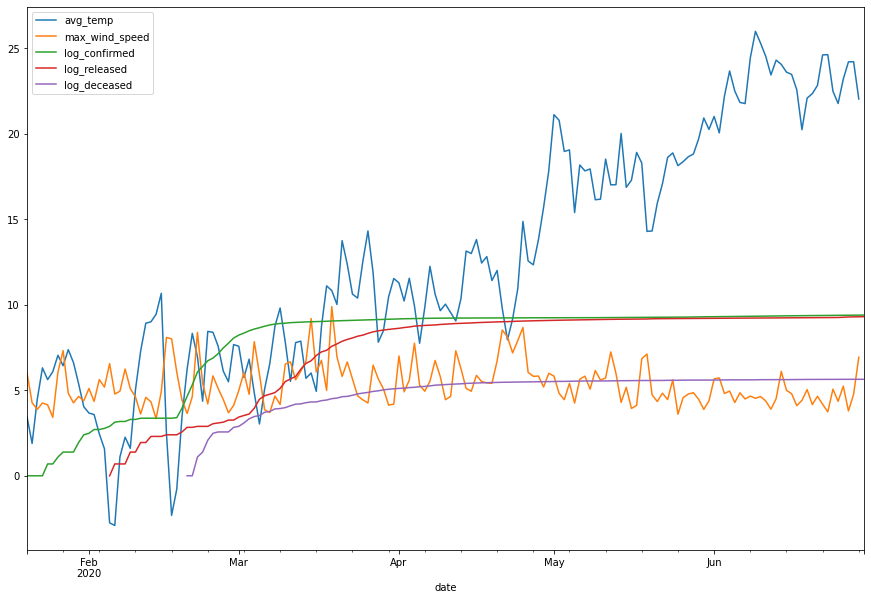

In [62]:
all_df_new.plot(x="date", y=["avg_temp", 'max_wind_speed',"log_confirmed","log_released","log_deceased"], kind = 'line')

,date,time,age,confirmed,deceased,ratio
0,2020-03-02,0,0s,32,0,0.000000
1,2020-03-02,0,10s,169,0,0.000000
2,2020-03-02,0,20s,1235,0,0.000000
3,2020-03-02,0,30s,506,1,0.001976
4,2020-03-02,0,40s,633,1,0.001580
...,...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3,0.001785
1085,2020-06-30,0,50s,2286,15,0.006562
1086,2020-06-30,0,60s,1668,41,0.024580
1087,2020-06-30,0,70s,850,82,0.096471


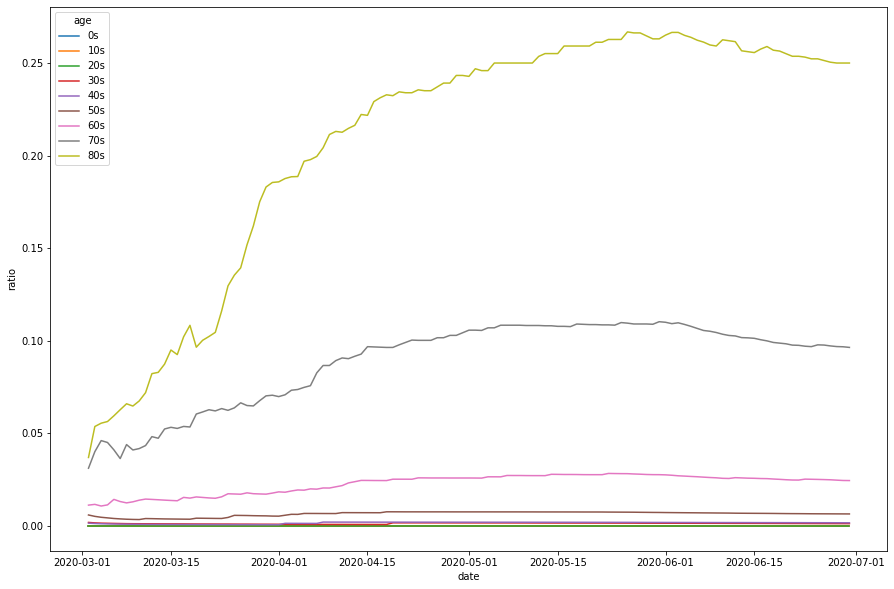

In [63]:
TimeAge_df['ratio'] = TimeAge_df.deceased/TimeAge_df.confirmed
sns.lineplot(x='date', y='ratio', hue='age', data=TimeAge_df)
TimeAge_df

Correlation Calculation

In [64]:
TimeAge_df['age_int'] = TimeAge_df.age.str.replace("s","").astype(int)
TimeAge_df

,date,time,age,confirmed,deceased,ratio,age_int
0,2020-03-02,0,0s,32,0,0.000000,0
1,2020-03-02,0,10s,169,0,0.000000,10
2,2020-03-02,0,20s,1235,0,0.000000,20
3,2020-03-02,0,30s,506,1,0.001976,30
4,2020-03-02,0,40s,633,1,0.001580,40
...,...,...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3,0.001785,40
1085,2020-06-30,0,50s,2286,15,0.006562,50
1086,2020-06-30,0,60s,1668,41,0.024580,60
1087,2020-06-30,0,70s,850,82,0.096471,70


In [65]:
TimeAge_df.age_int.corr(TimeAge_df.deceased, method = "pearson")

0.7629532434194036

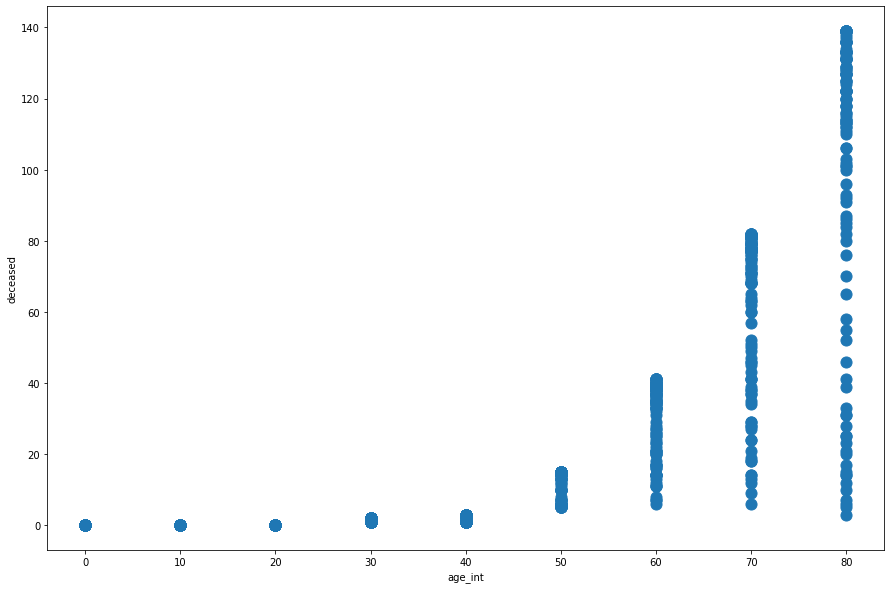

In [66]:
TimeAge_df.plot.scatter(x = 'age_int', y = 'deceased', s = 123)

Population density of all provinces in Korea and relate that to the number of cases, is there a correlation?

In [67]:
province_data = {
    'province': ['Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
    'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Busan', 'Daegu', 'Daejeon', 'Gwangju', 'Incheon', 'Ulsan', 'Seoul', 'Jeju-do', 'Sejong'],
    'population': [12479061, 1518040, 1589377, 2107802, 1834114, 1799044, 2680294, 3334524, 3448737, 2466052, 1538394, 1502881, 2890451, 1166615, 9904312, 605619, 204088],
    'area': [10183.5, 16827.1, 7407.3, 8226.1, 8069.1, 12318.8, 19031.4, 10539.6, 769.6, 883.6, 539.3, 501.2, 1062.6, 1060.8, 605.2, 1849.1, 464.9]
}

provinces = pd.DataFrame(data = province_data, columns = ['province', 'population', 'area'])
provinces['pop_density'] = provinces.population/ provinces.area
provinces

,province,population,area,pop_density
0,Gyeonggi-do,12479061,10183.5,1225.419649
1,Gangwon-do,1518040,16827.1,90.214000
2,Chungcheongbuk-do,1589377,7407.3,214.569006
3,Chungcheongnam-do,2107802,8226.1,256.233452
4,Jeollabuk-do,1834114,8069.1,227.300938
5,Jeollanam-do,1799044,12318.8,146.040523
6,Gyeongsangbuk-do,2680294,19031.4,140.835356
7,Gyeongsangnam-do,3334524,10539.6,316.380508
8,Busan,3448737,769.6,4481.207121
9,Daegu,2466052,883.6,2790.914441


In [68]:
province_group

,province,confirmed,released,deceased
0,Busan,154,143,3
1,Chungcheongbuk-do,65,60,0
2,Chungcheongnam-do,167,150,0
3,Daegu,6906,6700,189
4,Daejeon,117,44,1
5,Gangwon-do,65,54,3
6,Gwangju,44,32,0
7,Gyeonggi-do,1207,931,23
8,Gyeongsangbuk-do,1389,1328,54
9,Gyeongsangnam-do,134,128,0


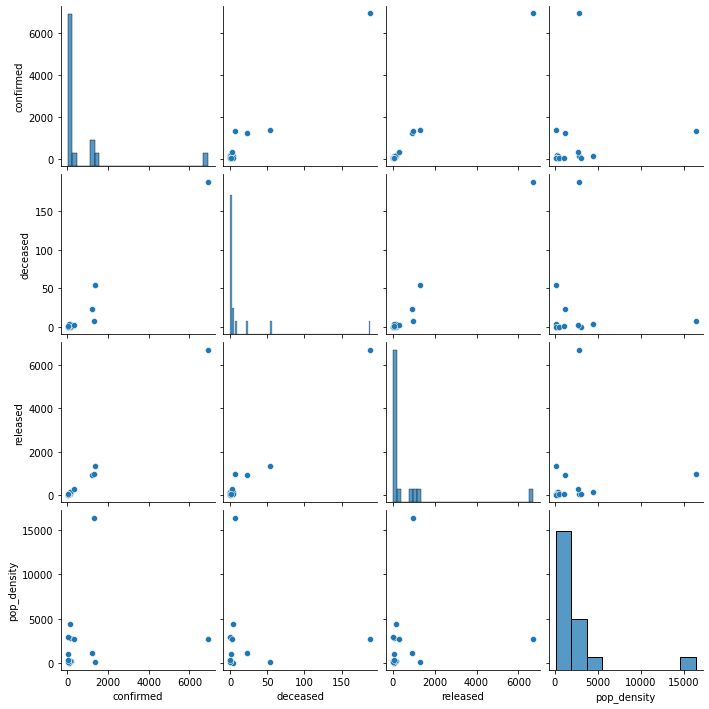

In [69]:
merged_inner_province = pd.merge(left=province_group, right=provinces, left_on='province', right_on='province')
merged_inner_province = merged_inner_province[['confirmed','deceased','released','pop_density']]
sns.pairplot(merged_inner_province)

Geomap plotting

In [70]:
SearchTrend_df['date'] = pd.to_datetime(SearchTrend_df['date'], format='%Y-%m-%d')
SearchTrend_df.groupby('date').mean()

,cold,flu,pneumonia,coronavirus
date,,,,
2016-01-01,0.11663,0.05590,0.15726,0.00736
2016-01-02,0.13372,0.17135,0.20826,0.00890
2016-01-03,0.14917,0.22317,0.19326,0.00845
2016-01-04,0.17463,0.18626,0.29008,0.01145
2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...
2020-06-25,0.12072,0.04190,0.11936,2.16993
2020-06-26,0.11381,0.03027,0.11317,2.15139
2020-06-27,0.10554,0.02136,0.08354,1.96848


In [71]:
TimeAge_df_search = TimeAge_df[['date','confirmed','deceased']]
TimeAge_df_search = TimeAge_df_search.groupby(['date']).agg({'confirmed':'sum','deceased':'sum'}).reset_index()
merged_TimeAge_search_df = pd.merge(left=SearchTrend_df, right=TimeAge_df_search, left_on='date', right_on='date')
merged_TimeAge_search_df

,date,cold,flu,pneumonia,coronavirus,confirmed,deceased
0,2020-03-02,0.88160,0.13345,0.44080,60.86853,4212,22
1,2020-03-03,0.67934,0.11917,0.39853,47.17367,4812,28
2,2020-03-04,0.82579,0.10790,0.35671,39.84053,5328,32
3,2020-03-05,0.64916,0.09745,0.31726,33.24218,5766,35
4,2020-03-06,0.58625,0.09163,0.28071,29.61647,6284,42
...,...,...,...,...,...,...,...
115,2020-06-25,0.12072,0.04190,0.11936,2.16993,12563,282
116,2020-06-26,0.11381,0.03027,0.11317,2.15139,12602,282
117,2020-06-27,0.10554,0.02136,0.08354,1.96848,12653,282
118,2020-06-28,0.12563,0.02872,0.08072,2.19720,12715,282


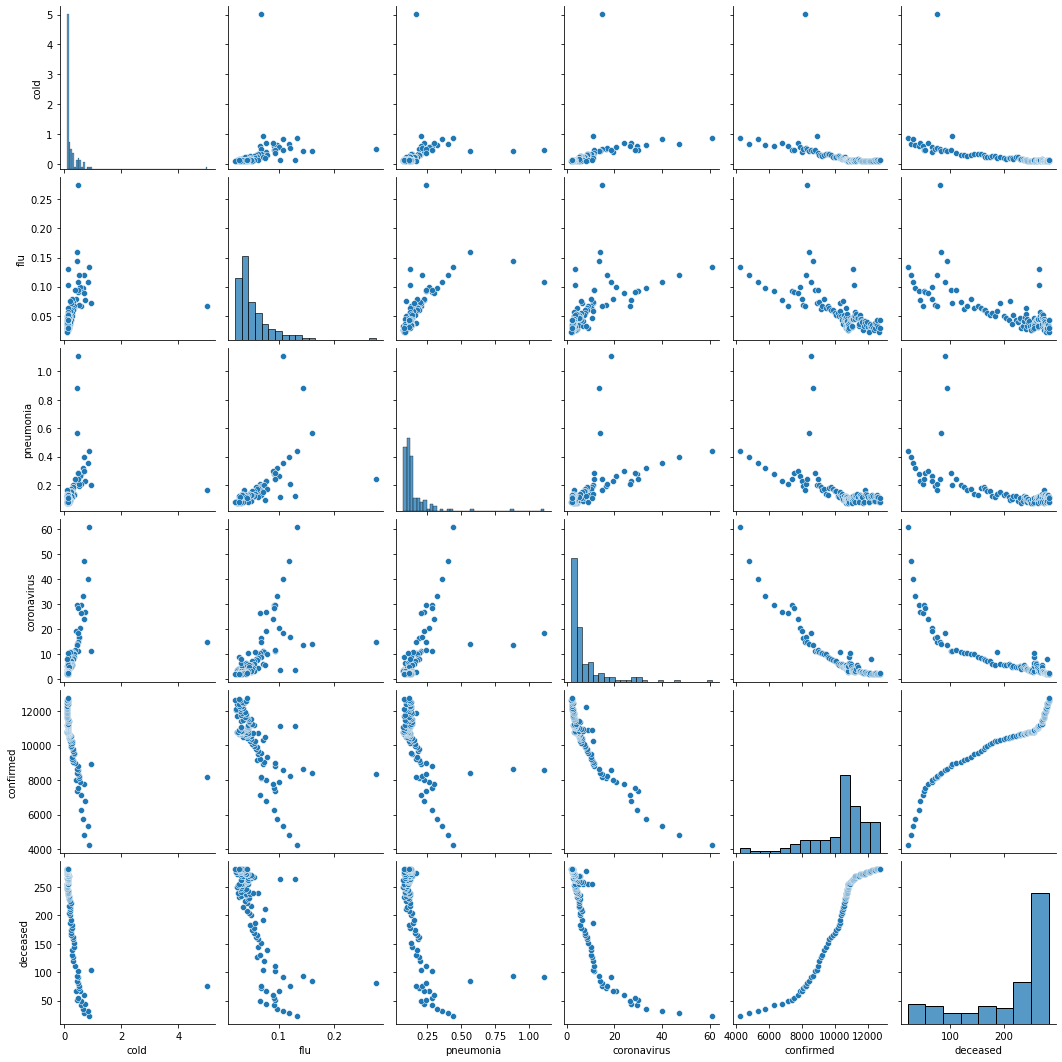

In [72]:
sns.pairplot(merged_TimeAge_search_df)

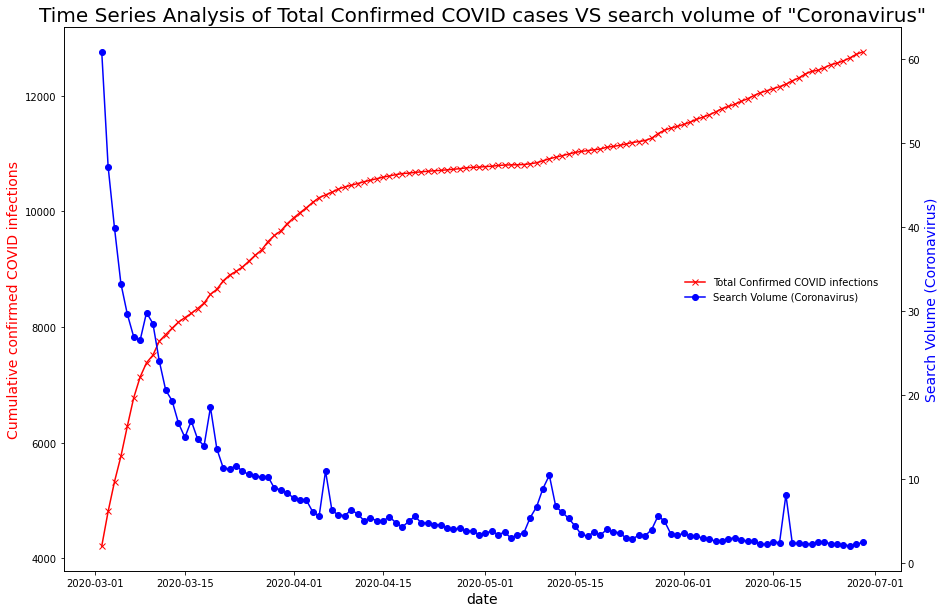

In [83]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(merged_TimeAge_search_df.date, merged_TimeAge_search_df.confirmed, color="red", marker="x",label = 'Total Confirmed COVID infections')
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("Cumulative confirmed COVID infections",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merged_TimeAge_search_df.date, merged_TimeAge_search_df["coronavirus"],color="blue",marker="o",label = 'Search Volume (Coronavirus)')
ax2.set_ylabel("Search Volume (Coronavirus)",color="blue",fontsize=14)
ax.set_title('Time Series Analysis of Total Confirmed COVID cases VS search volume of "Coronavirus"',fontdict={'fontsize': '20', 'fontweight' : '4'})
fig.legend(loc = (.72,.5), frameon = False)
plt.show()

In [84]:
merged_TimeAge_search_df

,date,cold,flu,pneumonia,coronavirus,confirmed,deceased
0,2020-03-02,0.88160,0.13345,0.44080,60.86853,4212,22
1,2020-03-03,0.67934,0.11917,0.39853,47.17367,4812,28
2,2020-03-04,0.82579,0.10790,0.35671,39.84053,5328,32
3,2020-03-05,0.64916,0.09745,0.31726,33.24218,5766,35
4,2020-03-06,0.58625,0.09163,0.28071,29.61647,6284,42
...,...,...,...,...,...,...,...
115,2020-06-25,0.12072,0.04190,0.11936,2.16993,12563,282
116,2020-06-26,0.11381,0.03027,0.11317,2.15139,12602,282
117,2020-06-27,0.10554,0.02136,0.08354,1.96848,12653,282
118,2020-06-28,0.12563,0.02872,0.08072,2.19720,12715,282


In [86]:
from scipy.stats import pearsonr
corr, _ = pearsonr(merged_TimeAge_search_df.coronavirus, merged_TimeAge_search_df.confirmed)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.920


In [74]:
Policy_df.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [75]:
!pip install geopandas
!pip install geoplot

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 15.4 MB 25.6 MB/s 
     |████████████████████████████████| 6.3 MB 19.1 MB/s 
     |████████████████████████████████| 10.8 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 14.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 10.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 448 kB/s 
     |████████████████████████████████| 219 kB 38.0 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516296 sha256=86b070a93117779c0810788936c852c1c03d336ccff13cf38bdec3d2e76a519e
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/b

In [76]:
import geopandas as gpd
import json
from shapely.geometry import MultiPolygon, Polygon, Point

In [77]:
geo_json_file_loc= 'stanford-dk009rq9138-geojson.json'
shape_file_loc = 'stanford-dk009rq9138-geojson.json'
def open_geojson():
    with open(geo_json_file_loc) as json_data:
        d = json.load(json_data)
    return d
    
def get_gpd_df(use_shape_file=True):
    if use_shape_file:
        gdf = gpd.read_file(shape_file_loc)
    else:
        korea_json = open_geojson()
        gdf = gpd.GeoDataFrame.from_features((korea_json))
    return gdf
gdf = get_gpd_df(geo_json_file_loc)
Case_df_map = Case_df[['province','city','confirmed','latitude','longitude']].dropna().sort_values(by = 'confirmed', ascending=False)
Case_df_map

,province,city,confirmed,latitude,longitude
48,Daegu,Nam-gu,4511,35.840080,128.566700
49,Daegu,Dalseong-gun,196,35.857375,128.466651
0,Seoul,Yongsan-gu,139,37.538621,126.992652
50,Daegu,Seo-gu,124,35.885592,128.556649
1,Seoul,Gwanak-gu,119,37.482080,126.901384
...,...,...,...,...,...
23,Seoul,Yeongdeungpo-gu,3,37.520846,126.931278
164,Gyeongsangnam-do,Yangsan-si,3,35.338811,129.017508
140,Jeollanam-do,Muan-gun,2,35.078825,126.316746
24,Seoul,Gangnam-gu,1,37.522331,127.057388


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Text(0.5, 1.0, 'Intensity of Confirmed COVID case numbers in Korea')

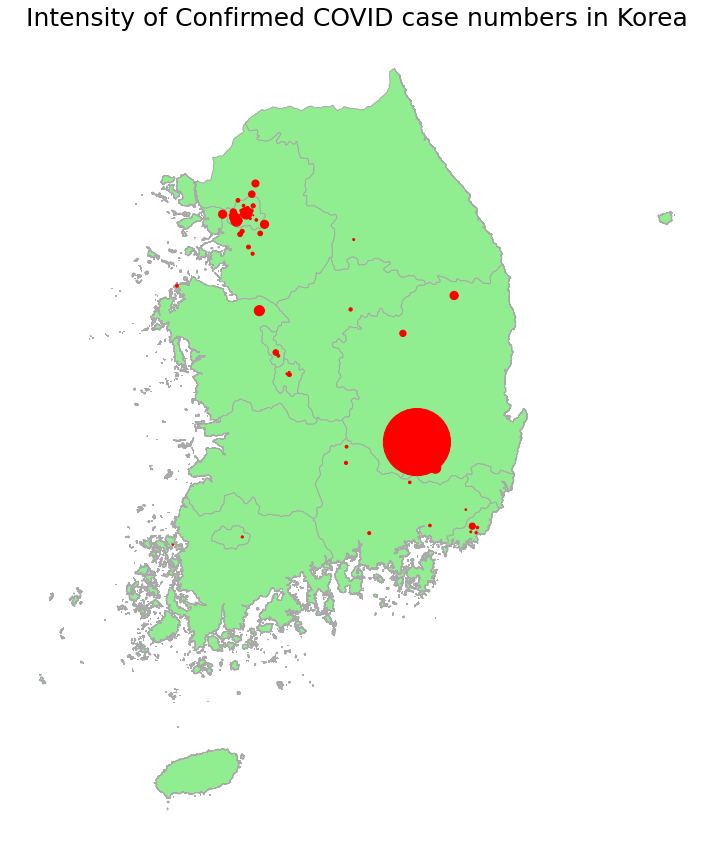

In [78]:
fig,ax = plt.subplots(figsize = (15,15))
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(Case_df_map['longitude'], Case_df_map['latitude'])]
geo_df = gpd.GeoDataFrame(Case_df_map, crs = crs, geometry=geometry)
gdf.plot(ax=ax, color = "lightgreen",edgecolor='darkgrey')
geo_df.plot(ax = ax, markersize = geo_df.confirmed, color = "red", marker = "o", label = "Confirmed")
ax.axis('off')
ax.set_title('Intensity of Confirmed COVID case numbers in Korea', fontdict={'fontsize': '25', 'fontweight' : '3'})

In [79]:
patient_longlat = Patient_df.groupby(['province','city']).agg({'confirmed_date':'count','deceased_date':'count'}).reset_index()
case_longlat = Case_df[['city','latitude','longitude']]

In [80]:
longlat_merged = pd.merge(left=patient_longlat, right=case_longlat, left_on='city', right_on='city')
longlat_merged.sort_values(by = 'confirmed_date', ascending=False)

,province,city,confirmed_date,deceased_date,latitude,longitude
78,Gyeongsangbuk-do,Gyeongsan-si,638,28,35.825580,128.737300
77,Gyeongsangbuk-do,Gyeongsan-si,638,28,35.848190,128.762100
76,Gyeongsangbuk-do,Gyeongsan-si,638,28,35.782149,128.801498
67,Gyeonggi-do,Seongnam-si,173,0,37.388330,127.121800
66,Gyeonggi-do,Seongnam-si,173,0,37.455687,127.161627
...,...,...,...,...,...,...
81,Jeollanam-do,Gyeongsan-si,1,0,35.825580,128.737300
80,Jeollanam-do,Gyeongsan-si,1,0,35.848190,128.762100
79,Jeollanam-do,Gyeongsan-si,1,0,35.782149,128.801498
1,Busan,Dong-gu,1,0,35.136035,126.956405


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



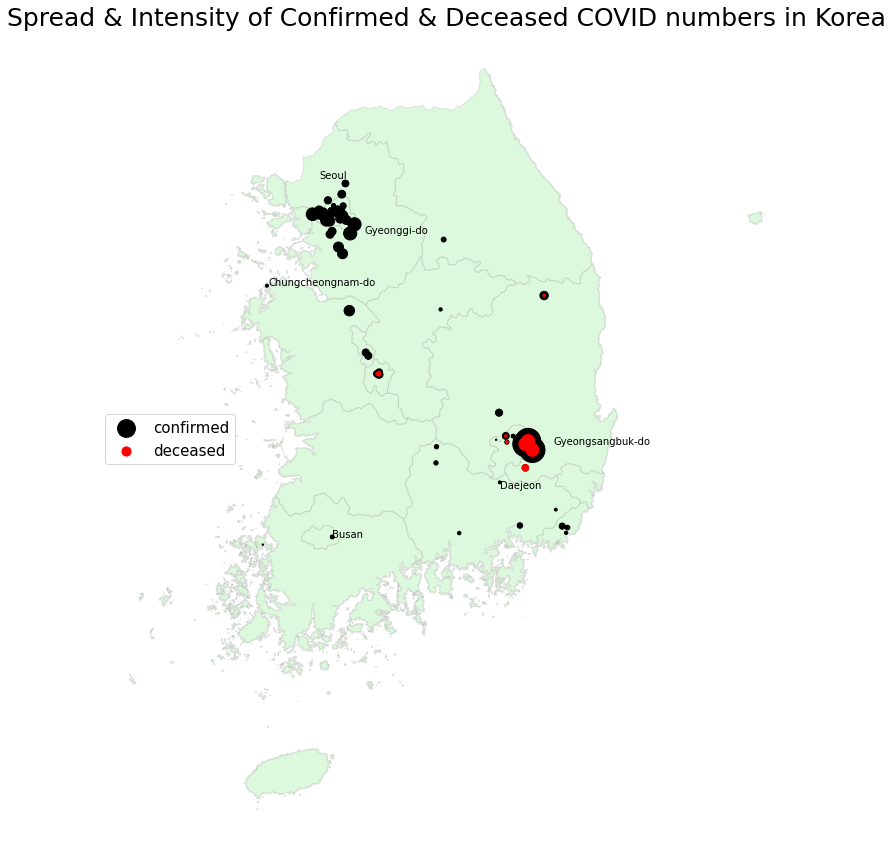

In [81]:
fig,ax = plt.subplots(figsize = (15,15))
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(longlat_merged['longitude'], longlat_merged['latitude'])]
geo_df = gpd.GeoDataFrame(longlat_merged, crs = crs, geometry=geometry)
gdf.plot(ax=ax, alpha = 0.3, color = "lightgreen",edgecolor='darkgrey')
geo_df.plot(ax = ax, markersize = longlat_merged.confirmed_date, color = "black", marker = "o", label = "confirmed_date")
geo_df.plot(ax = ax, markersize = 6*longlat_merged.deceased_date, color = "red", marker = "o", label = "deceased_date")
ax.axis('off')
ax.set_title('Spread & Intensity of Confirmed & Deceased COVID numbers in Korea', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate("Gyeongsangbuk-do", xy=(129, 35.825580))
ax.annotate("Busan", xy=(126.956405, 35.136035))
ax.annotate("Gyeonggi-do", xy=(127.25, 37.388330))
ax.annotate("Seoul", xy=(126.835102, 37.8))
ax.annotate("Daejeon", xy=(128.5, 35.5))
ax.annotate("Chungcheongnam-do", xy=(126.364443, 37.000354))
ax.legend(labels=['confirmed','deceased'], prop={'size': 15},loc = "center left")